<a href="https://colab.research.google.com/github/reza-chehreqani/Artificial-Intelligence/blob/main/Projects/Project%203/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3
# Name: Reza Chehreghani
# SID: 810101401
# University of Tehran

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_dir = '/content/drive/MyDrive/Artificial Intelligence/Project 3/810101401, Reza, Chehreghani' + '/'

# Part I- Reinforcement Learning and Deep Q Learning

## [A]. Explain Policy Iteration with a clear example

Policy Iteration is a way to find the optimal policy for given states and actions. Let us assume we have a policy ($𝝅 : S → A$) that assigns an action to each state. Action $𝝅(s)$ will be chosen each time the system is at state $s$.

#### **The idea of policy iteration**

1.   Evaluate a given policy (eg. initialise policy     arbitrarily for all states $s ∈ S$) by calculating value function for all states $s ∈ S$ under the given policy.
$$V^π(s)=E[R_{ss'}^{π(s)}+γV(s')]$$
Value function = the expected reward collected at the first step + expected discounted value at the next state

2.   Improve policy: find a better action for state $s ∈ S$
$$π_{new}(s)=argmax_{a ∈ A} E[R_{ss'}^a+γV(s')]$$

3.  Repeat step 1,2 until value function converge to optimal value function.

### Policy evaluation example

Find the optimal policy for a planing problem (4x4 grid) \\
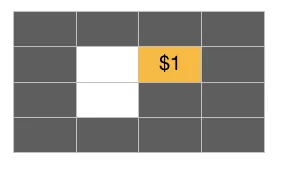

Three states s(x,y): s(2,2) s(2,3) s(3,2) \\
Four actions $𝝅(s)$: go up, go down, go left, go right

For a given action $𝝅(s)$ under the policy, the probability that action will be done is 0.70. and the other actions will have the probability at 0.10.
If an agent is at the goal s(3,2), the agent will stop with probability of 1.

Let’s a discount factor ($𝛄$) equals 0.9.

#### **Step1: Evaluate a given policy**

Start with a simple policy $𝝅$ : Always go right \\
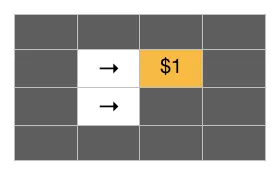

Probability of actions for the given policy \\
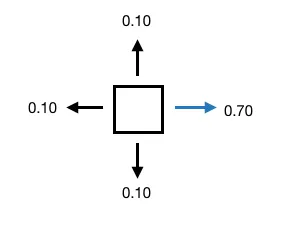

Calculate value function for a simple policy $𝝅$ \\
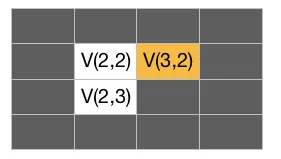

$V(3,2)=1(1+0.9V(3,2))$ \\
$V(2,2)=0.7(1+0.9V(3,2))+0.1(0+0.9V(2,3))+0.2(0+0.9V(2,2))$ \\
$V(2,3)=0.9(0+0.9V(2,3))+0.1(0+0.9V(2,2))$

Solving, we get: \\
$V(3,2) = 10$ \\
$V(2,2) = 9$ \\
$V(2,3) = 4.265$ \\


#### **Step2: Improve policy**

A simple policy: \\
$π_0(2,2)=go \: right$ \\
$π_0(2,3)=go \: right$ \\
$π_0(3,2)=Stop$

Update it : \\
$π_1(2,2) = argmax \left\{\begin{matrix}
right: 0.2(0.9)(9) + 0.7(1+ (0.9) (10)) + 0.1(0.9) (4.265) = 9 \\
up: 0.8(0.9)(9) + 0.1(1 + (0.9) (10)) + 0.1(0.9) (4.265) = 7.86 \\
down: 0.2(0.9)(9) + 0.1(1+ (0.9)(10)) + 0.7(0.9)(4.265) = 5.28  \\
left: 0.8(0.9)(9) + 0.1(1+ (0.9) (10)) + 0.1(0.9) (4.265) = 7.86
\end{matrix}\right.$

$π_1(2,3) = argmax \left\{\begin{matrix}
right: 0.9(0.9) (4.265) + 0.1(0.9)(9) = 4.265 \\
up: 0.3(0.9) (4.265) + 0.7(0.9) (9) = 6.821 \\
down: 0.9(0.9)(4.265) + 0.1(0.9)(9) = 4.265  \\
left: 0.9(0.9) (4.265) + 0.1(0.9)(9) = 4.265
\end{matrix}\right.$

$π_1(2,2) = go \: right$ \\
$π_1(2,3) = go \: up$ \\
$π_1(3,2) = Stop$

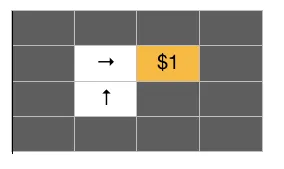

#### **Step3: Repeat it until convergent**

Repeat step 1,2 until everything isn’t change.

source: https://medium.com/@pesupavish/policy-iteration-easy-example-d3fd1eb98c6c

## [B]. Explain the following codes line by line and use hyperparameter optimization to improve the entire notebook

In [ ]:
def train(self, batch_size):
    minibatch = random.sample(self.memory, batch_size)
    for state, action, reward, next_state, done in minibatch:

In [ ]:
for e in range(n_episodes):

    state = env.reset()
    state = np.reshape(state, [1, state_size])
    done = False
    time = 0

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state

        if done:
            print("episode: {}/{}, score: {}, e: {:.2}".format(e, n_episodes-1, time, agent.epsilon))

        time += 1
        env.render()

    if len(agent.memory) > batch_size:
        agent.train(batch_size)

    if e % 50 == 0:
        agent.save(output_dir + "weights_" + '{:04d}'.format(e) + ".hdf5")

### **Hyperparameter optimization**

#### 1. Import dependencies

install `keras-tuner` to compare the result of different values for hyperparameters

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner

In [ ]:
import random
import gym
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Adam
from IPython.display import HTML
import os

#### 2. Hyperparameters and initialise environment

In [ ]:
env = gym.make('CartPole-v0') # initialise environment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns 

In [ ]:
state_size = env.observation_space.shape[0]
state_size

4

#### 3. The agent can take two actions-right or left

In [ ]:
action_size = env.action_space.n
action_size

2

#### 4. DQNAgent

we changed the model by adding some arguments to make the NN model with different value for hyperparameters.

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size, **kwargs):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000) # deque is like list and we can append elements to it.
        self.gamma = 0.95 # discount rate.
        self.epsilon = 1.0 # exploration rate: how much to act randomly.
        self.epsilon_decay = 0.99 # decrease number of random explorations as the agent's performance improves.
        self.epsilon_min = 0.01 # minimum amount of random exploration permitted.
        # self.learning_rate = 0.001 # learning rate.
        self.model = self._build_model(**kwargs) # This is a private method

    #==============================================================================================
    #Step 2

    def _build_model(self, num_layers, layers_units, activation, learning_rate):
        # neural net to approximate Q-value function.# Q is a f of s,a,theta
        model = Sequential()
        model.add(Dense(layers_units[0], activation=activation, input_dim=self.state_size))
        for i in range(num_layers - 1):
            model.add(Dense(layers_units[i+1], activation=activation))
        model.add(Dense(self.action_size, activation='linear')) # 2 actions. 2 output neurons: 0 and 1 (L/R)
        model.compile(loss='mse',
                      optimizer=Nadam(learning_rate=learning_rate)) # You can change this to Adam or other optimisers.
        return model

    #==================================================================================================

    #Step 3

    def remember(self, state, action, reward, next_state, done): # done means game is over or final or early termination.
        self.memory.append((state, action,
                            reward, next_state, done)) # list of previous experiences, enabling re-training later
     #=====================================================================================================

    # Step 4# [This will be part of your third project]#

    def train(self, batch_size): # method that trains NN with experiences sampled from memory
        minibatch = random.sample(self.memory, batch_size) # sample a minibatch from memory
        for state, action, reward, next_state, done in minibatch: # extract data for each minibatch sample
            target = reward # if done, then target = reward
            if not done: # if not done, then predict future discounted reward
                target = (reward +  # target here predicts the agent future rewards from the next state
                          self.gamma * # (target) = reward + (discount rate gamma) * # Using Bellman equation
                          np.amax(self.model.predict(next_state, verbose=0)[0])) # (maximum Q value based on future action a')
            target_f = self.model.predict(state, verbose=0) # map current state to our prediction of future discounted reward
            target_f[0][action] = target # We use the discounted future rewards based on the action that the agent took.
            self.model.fit(state, target_f, epochs=1, verbose=0) # using the NN to see which action is optimal,given s
        if self.epsilon > self.epsilon_min: # epochs=1 b/c no need to use recycle data. We can generate data by OpenAIGym
            self.epsilon *= self.epsilon_decay # Here we are adjusting the value of epsilon if the condition is true.

    def act(self, state):
        if np.random.rand() <= self.epsilon: # if acting randomly, take random action. take a random no from 0 to 1.
            return random.randrange(self.action_size) # The agent at this stage will explore
        act_values = self.model.predict(state, verbose=0) # if not acting randomly, predict reward value based on current state
        # As time progresses, the agent will take less random action=> the agent will exploit.
        # Our model will be used to predict the highest reward based on two actions.
        return np.argmax(act_values[0]) # pick the action that will give maximise the agent reward (left or right)

    #============================================================================================================

    # Step 5
    # We save our model so we can use it later.

    def save(self, name):
        self.model.save_weights(name)

    def load(self, name):
        self.model.load_weights(name)

#### 5. Define Tuner Class to Traning Model

Make a class to keep our end-to-end workflow in one place by overriding `Tuner.run_trial()`, which gives us full control of a trial. Each trial is an instance of an agent with particular, distinct hyperparameters trained for many episodes. Some of the hyperparameters varied between trials were as follows.
* Dense net model architecture
    * [32]: a single hidden layer, with 32 neurons
    * [64]: also a single hidden layer, this time with 64 neurons
    * [32, 16]: two hidden layers; the first with 32 neurons and the second with 16
    * [64, 32]: also with two hidden layers, this time with 64 neurons in the first hidden layer and 32 in the second
* Activation function across all hidden layers
    * Sigmoid
    * Tanh
    * ReLU
* Optimizer learning rate (η), which ranged from 0.001 up to 0.01

Also, we define the score of agent as the average playing time in the last 10% of episodes.

In [ ]:
class Tuner(keras_tuner.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        agent = self.build(trial.hyperparameters, *args)
        score = self.fit(agent, **kwargs)
        return score


    def build(self, hp, *args):
        num_layers=hp.Int("num_layers", 1, 2)
        layers_units=[hp.Int("units_1", min_value=32, max_value=64, step=32)]
        for i in range(num_layers - 1):
            layers_units.append(hp.Int(f"units_{i+2}", min_value=16, max_value=32, step=16))

        return DQNAgent(*args,
            num_layers=num_layers,
            layers_units=layers_units,
            activation=hp.Choice("activation", ["relu", "sigmoid", "tanh"]),
            learning_rate=hp.Float("learning_rate", min_value=0.001, max_value=0.01, sampling="log")
        )


    def fit(self, agent, n_episodes, batch_size):
        latest_scores = np.zeros(int(0.1 * n_episodes))

        for e in range(n_episodes): # iterate over episodes of gameplay

            state = env.reset() # reset state and get four random states.
            state = np.reshape(state, [1, state_size]) # To pass this to the NN.

            done = False
            time = 0 # goal is to keep pole upright as long as possible.
            while not done:
            # This while loop ends if we get to 200 timesteps or the pole falls, or cart disappears from the screen.
                action = agent.act(state) # Given the state, the agent takes an action (move cart left or right).
                next_state, reward, done, _ = env.step(action) # agent interacts with env, gets feedback; 4 state data points.
                reward = reward if not done else -10 # reward +1 for each additional frame with pole upright and -10 for ending the game.
                next_state = np.reshape(next_state, [1, state_size]) # To pass this to the NN.
                agent.remember(state, action, reward, next_state, done) # To remember the previous timestep's state, actions, reward, etc.
                state = next_state # set current state to the current next state for the next while loop
                if done: # if episode ends:
                    print("episode: {}/{}, score: {}, e: {:.2}" # print the episode's score and agent's epsilon
                        .format(e, n_episodes-1, time, agent.epsilon))
                time += 1

            if e >= int(0.9*n_episodes):
                latest_scores[e - int(0.9*n_episodes)] = time - 1

            if len(agent.memory) > batch_size:
                agent.train(batch_size) # train the agent by replaying the experiences of the episode

            # after 50 episodes, we save our weights.

            # if e % 50 == 0:
            #     agent.save(output_dir + "weights_"
            #             + '{:04d}'.format(e) + ".hdf5")

        return sum(latest_scores) / len(latest_scores)

#### 6. Search the state space with 5 kinds of different hyperparameter

In [ ]:
tuner = Tuner(max_trials=5,
              overwrite=True,
              objective=keras_tuner.Objective('score', direction="max"))

tuner.search(state_size, action_size, n_episodes=200, batch_size=32)

Trial 5 Complete [00h 27m 35s]
score: 19.95

Best score So Far: 103.7
Total elapsed time: 02h 31m 19s


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 32, 'step': 16, 'sampling': 'linear'}


#### 7. Show the tuning summery and conclusion

In our simple searching space, we found out that the following hyperparameter settings are optimal for this DQN agent playing the Cart-Pole game:
* two-hidden-layer neural net architecture, with 32 neurons in both of those layers.
* The tanh activation function for the hidden layers neurons.
* A low learning rate (η) of ~0.003.

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="score", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 2
units_1: 32
activation: tanh
learning_rate: 0.002791809100482754
units_2: 32
Score: 103.7

Trial 2 summary
Hyperparameters:
num_layers: 2
units_1: 32
activation: tanh
learning_rate: 0.0019989858622055374
units_2: 16
Score: 89.4

Trial 4 summary
Hyperparameters:
num_layers: 1
units_1: 64
activation: sigmoid
learning_rate: 0.0033760656456701156
units_2: 16
Score: 19.95

Trial 0 summary
Hyperparameters:
num_layers: 1
units_1: 32
activation: relu
learning_rate: 0.001
Score: 15.55

Trial 1 summary
Hyperparameters:
num_layers: 2
units_1: 64
activation: sigmoid
learning_rate: 0.001250324885972424
units_2: 16
Score: 15.3


## [C]. Elucidate the FrozenLake problem statement, write the codes, and show how we can use a neural network-based Q-learning system to learn a safe path from state S to state G.

We'll implement an agent **that plays FrozenLake**.

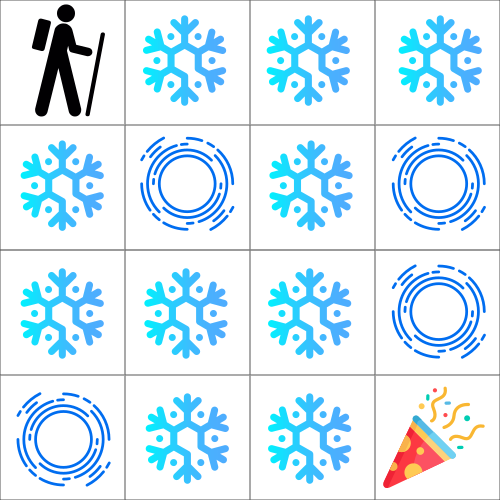

The goal of this game is **to go from the starting state (S) to the goal state (G)** by walking only on frozen tiles (F) and avoid holes (H).However, the ice is slippery, **so you won't always move in the direction you intend (stochastic environment)**

#### Import dependencies

In [ ]:
import random
import numpy as np

# for creating the environment
import gym

# for making the memory
from collections import deque

# for making the Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# for creating the model weights directory
import os

# for ignoring warnings
import warnings
# warnings.filterwarnings("ignore")

#### Create the environment
- Here we'll create the FrozenLake environment.
- OpenAI Gym is a library **composed of many environments that we can use to train our agents.**
- In our case we choose to use Frozen Lake.

Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.

**Action Space**: The action shape is (1,) in the range {0, 3} indicating which direction to move the player.
* 0: Move left
* 1: Move down
* 2: Move right
* 3: Move up

**Observation Space**: The observation is a value representing the player’s current position as current_row * nrows + current_col (where both the row and col start at 0).

**Rewards**: Reward schedule:
* Reach goal: +1
* Reach hole: 0
* Reach frozen: 0

**Episode End**: The episode ends if the following happens:
* Termination:
    1. The player moves into a hole.
    2. The player reaches the goal.
* Truncation (when using the time_limit wrapper):
    1. The length of the episode is 100

In [ ]:
# initialise environment
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


#### Set hyperparameters

In [ ]:
state_size = env.observation_space.n
state_size

16

In [ ]:
action_size = env.action_space.n
action_size

4

In [ ]:
batch_size = 32

In [ ]:
# n games we want agent to play
n_episodes = 1000

In [ ]:
output_dir = 'model_output/FrozenLake/'

In [ ]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Define agent

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size

        # double-ended queue; acts like list, but elements can be added/removed from either end
        self.memory = deque(maxlen=2000)

        # decay or discount rate: enables agent to take into account future actions in addition to the immediate ones, but discounted at this rate
        self.gamma = 0.95

        # exploration rate: how much to act randomly; more initially than later due to epsilon decay
        self.epsilon = 1.0

        # decrease number of random explorations as the agent's performance (hopefully) improves over time
        self.epsilon_decay = 0.995

        # minimum amount of random exploration permitted
        self.epsilon_min = 0.01

        # rate at which NN adjusts models parameters via Adam to reduce cost
        self.learning_rate = 0.001

        self.model = self._build_model()


    def _build_model(self):
        # neural net to approximate Q-value function:
        model = Sequential([
            Dense(32, activation='relu', input_dim=self.state_size), # 1st hidden layer; states as input
            Dense(32, activation='relu'), # 2nd hidden layer
            Dense(self.action_size, activation='linear') # 4 actions, so 4 output neurons
        ])

        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        # list of previous experiences, enabling re-training later
        self.memory.append((state, action, reward, next_state, done))

    # method that trains NN with experiences sampled from memory
    def train(self, batch_size):
        # sample a minibatch from memory
        minibatch = random.sample(self.memory, batch_size)

        # extract data for each minibatch sample
        for state, action, reward, next_state, done in minibatch:
            if done:
                target = reward
            else: # if not done, then predict future discounted reward
                target = (reward +
                          self.gamma * # (target) = reward + (discount rate gamma) *
                          np.max(self.model.predict(next_state, verbose=0)[0])) # (maximum target Q based on future action a')

            # approximately map current state to future discounted reward
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target

            # single epoch of training with x=state, y=target_f; fit decreases loss btwn target_f and y_hat
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def act(self, state):
        # if acting randomly, take random action
        if np.random.rand() <= self.epsilon:
            return random.randint(0, self.action_size - 1)

        # if not acting randomly, predict reward value based on current state
        act_values = self.model.predict(state, verbose=0)

        # pick the action that will give the highest reward (i.e., go left or down or right or up?)
        return np.argmax(act_values[0])

    def save(self, name):
        self.model.save_weights(name)

    def load(self, name):
        self.model.load_weights(name)

target calculation if not done:
$$Q(s,a)=E[R^a_{ss'}+γV(s')]=E[R^a_{ss'}+γ \: max_aQ(s', a)]$$

#### Interact with environment

In [ ]:
# initialise agent
agent = DQNAgent(state_size, action_size)

In [ ]:
# iterate over episodes of gameplay
for episode in range(n_episodes):

    # reset state at start of each new episode of the game
    state = env.reset()

    # change the state number to One-hot implementation as the input of NN
    state_arr = np.zeros(state_size)
    state_arr[state] = 1
    state= np.reshape(state_arr, [1, state_size])

    # time represents a frame of the episode
    time = 1
    done = False

    while not done:
        # env.render()

        # action is either 0 or 1 or 2 or 3 (left or down or right or up); decide one of them
        action = agent.act(state)

        # agent interacts with env, gets feedback; 16 state data points
        next_state, reward, done, _ = env.step(action)

        # reward = -1 if done and time<100 and reward==0 else 10*reward

        # change the number of next state to One-hot implementation as the input of NN
        next_state_arr = np.zeros(state_size)
        next_state_arr[next_state] = 1
        next_state = np.reshape(next_state_arr, [1, state_size])

        # remember the previous timestep's state, actions, reward, etc.
        agent.remember(state, action, reward, next_state, done)

        # set "current state" for upcoming iteration to the current next state
        state = next_state

        if done: # if episode ends:
            # print the episode's score and agent's epsilon
            print(f'Episode: {episode:4}/{n_episodes} and step: {time:4}. reward {reward}, Eps: {float(agent.epsilon):.2}')

        time += 1

    # train the agent by replaying the experiences of the episode
    if len(agent.memory) > batch_size:
        agent.train(batch_size)

    if episode % 50 == 0:
        agent.save(output_dir + "weights_" + '{:04d}'.format(episode) + ".hdf5")

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode:    0/1000 and step:    6. reward 0.0, Eps: 1.0
Episode:    1/1000 and step:    6. reward 0.0, Eps: 1.0
Episode:    2/1000 and step:   11. reward 0.0, Eps: 1.0
Episode:    3/1000 and step:    6. reward 0.0, Eps: 1.0
Episode:    4/1000 and step:    5. reward 0.0, Eps: 1.0
Episode:    5/1000 and step:    9. reward 0.0, Eps: 0.99
Episode:    6/1000 and step:   11. reward 0.0, Eps: 0.99
Episode:    7/1000 and step:    3. reward 0.0, Eps: 0.99
Episode:    8/1000 and step:    3. reward 0.0, Eps: 0.98
Episode:    9/1000 and step:    6. reward 0.0, Eps: 0.98
Episode:   10/1000 and step:    5. reward 0.0, Eps: 0.97
Episode:   11/1000 and step:    3. reward 0.0, Eps: 0.97
Episode:   12/1000 and step:    5. reward 0.0, Eps: 0.96
Episode:   13/1000 and step:    9. reward 0.0, Eps: 0.96
Episode:   14/1000 and step:    9. reward 0.0, Eps: 0.95
Episode:   15/1000 and step:    4. reward 0.0, Eps: 0.95
Episode:   16/1000 and step:    4. reward 0.0, Eps: 0.94
Episode:   17/1000 and step:   19. r

In [ ]:
# saved agents can be loaded with agent.load("./path/filename.hdf5")

source: https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/cartpole_dqn.ipynb

# Part II- Recurrent Neural Network (RNN) and Long short-term memory (LSTM)

## [A]. You must provide the complete mathematical intuition behind Long short-term memory (LSTM) by an example. LSTM has several gates: forget, input, and output. All these gates must be explained. The reason that we need to improve RNN should be elucidated. Furthermore, you should show all the steps for backpropagation in LSTM using the example you employed in the first part of this question.

#### **Vanishing gradient and LTSM**

Similar to all deep architectures, the deeper the networks get, the more severe the vanishing gradient problem gets. What's happening is that the weights at the beginning of the network change less and less. Given that the network's weights are generated randomly, with non-moving weights, we are learning very little from the data. This so-called *vanishing gradient* problem also affects RNN.

Each of the time steps in RNN can be thought of as a layer. Then, during backpropagation, errors are going from one time step to the previous one. So the network can be thought of as being as deep as the number of time steps.  If the sequences are very long, and the gradients computed during training/BPTT either vanish (as a result of multiple multiplications of 0 < values < 1, given that unrolled RNN is deep) or explode, the networks would learn very slowly.

LSTM addresses the problem of training over long sequences and retaining memory by introducing a few more gates that control access to the cell state. The new cell structure
helps to maintain a more constant error so that it allows recurrent nets to continue to learn over many time steps (which sometimes can be over 1000).

#### **Cells and gates in LTSM**

LSTM networks consist of many connected LSTM cells, and each of them can be thought of as being composed of three important gates. Those gates decide whether the information from the past/present flow through.

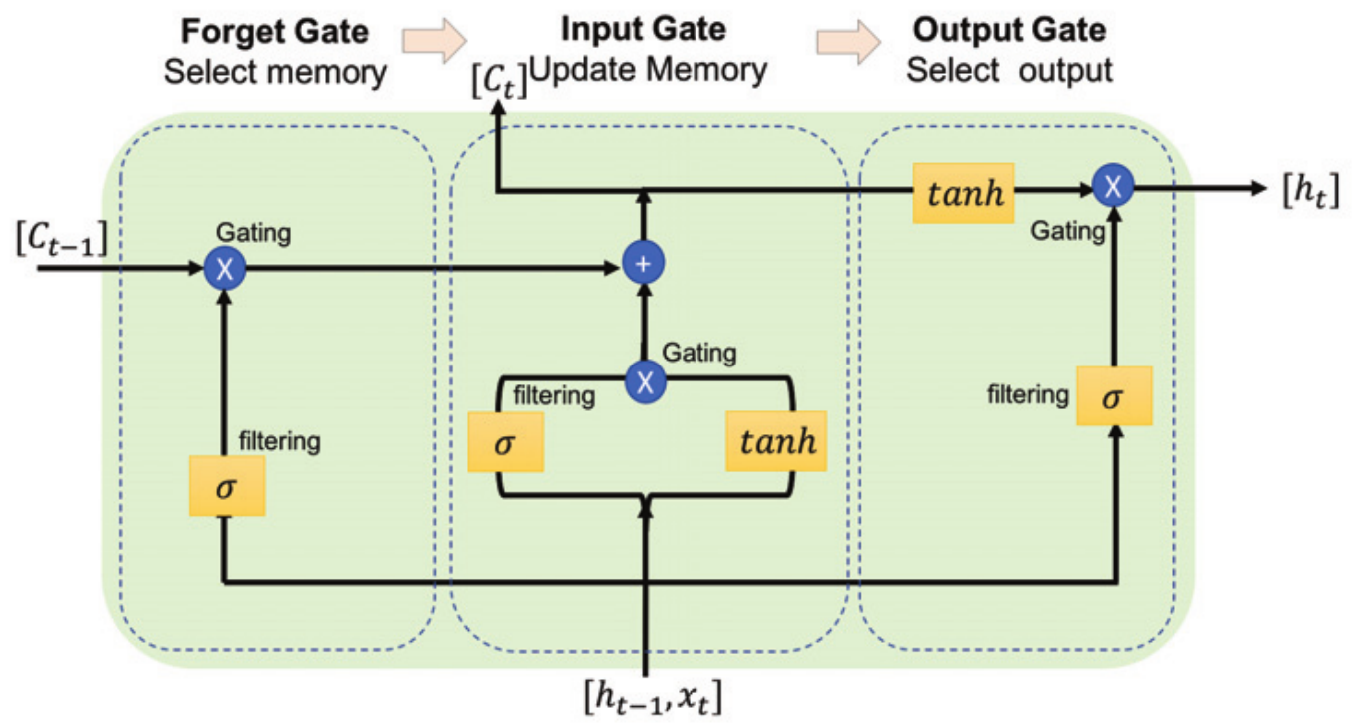

##### **Step 1 - The forget gate**

The forget gate decides which memory we'd like to keep or throw away from the past cell state $C_{t-1}$. This is achieved by piping the $[h_{t-1}, x_t]$ through an activation/squashing function (sigmoid) to obtain an indicator vector, and then multiplying this vector (gating) by the previous cell state vector $C_{t-1}$.

The result $f_t$ represents the kept information memorized from the previous states that we think is going to be useful for the current value.

##### **Step 2 - Updating memory/cell state**

The next step is to update the cell state from $C_{t-1}$ to $C_t$. The selected hidden memory from step 1 is combined additively with a filtered version of the current input. The filtering is conducted again by the so-called **input gate**, which is a sigmoid layer that decides which
values we'd like to update. This filtering decision is multiplied by the activation results by tanh and then added to the selected memory vector from the forget gate. The result is used to update the cell state $C_t$.

##### **Step 3 - The output gate**

The **output gate** decides what we're going to output, that is, selectively decide what part of the current cell state we want to output as the new hidden state/output/prediction. Again, the sigmoid node is used to generate the filtering vector from $[h_{t-1}, x_t]$ (decides what parts of the current cell state would be selected). Then, the current cell state $C_t$ is put through a tanh (for the purpose of squashing the value to between -1 and 1), and multiplied by the output of the sigmoid gate. Then we get our final output $h_t$.

source: Deep Learning Essentials: Your hands-on guide to the fundamentals of deep learning and neural network modeling, Wei Di, Anurag Bhardwaj, Jianing Wei, 2018

### **Mathematical intuition behind Long short-term memory (LSTM)**

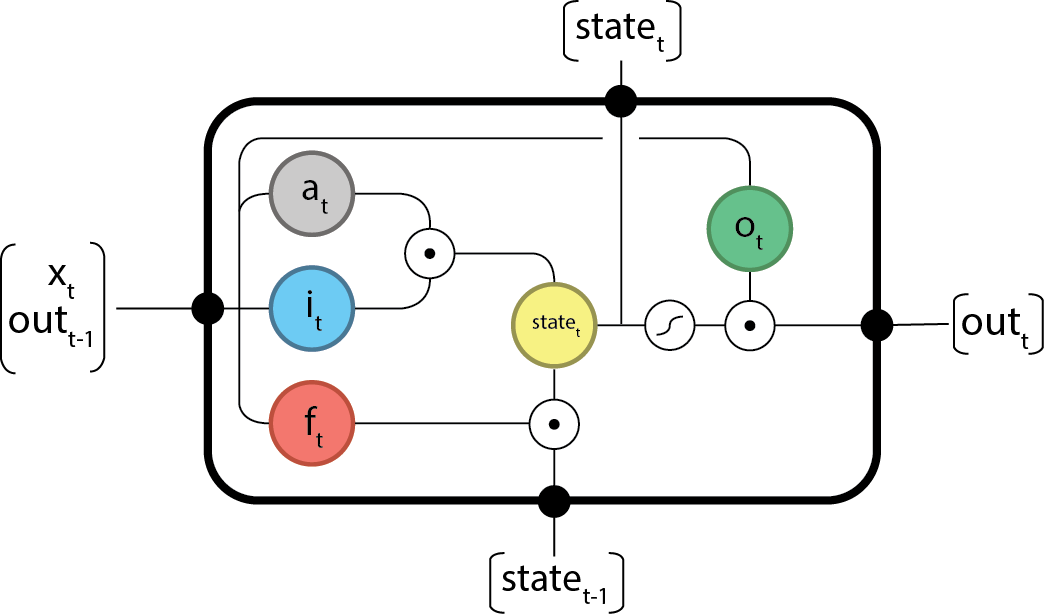

#### **Syntactic notes**
* Above ⨀ is the element-wise product or Hadamard product.
* Inner products will be represented as ⋅
* Outer products will be respresented as ⨂
* σ represents the sigmoid function: $\sigma(x) = \dfrac{1}{1 + e^{-x}}$

#### **The forward components**
The gates are defined as:
* Input activation:
$$a_{t} = \tanh(W_{a} \cdot x_{t} + U_{a} \cdot out_{t-1} + b_{a})$$
* Input gate:
$$i_{t} = \sigma(W_{i} \cdot x_{t} + U_{i} \cdot out_{t-1} + b_{i})$$
* Forget gate:
$$f_{t} = \sigma(W_{f} \cdot x_{t} + U_{f} \cdot out_{t-1} + b_{f})$$
* Output gate:
$$o_{t} = \sigma(W_{o} \cdot x_{t} + U_{o} \cdot out_{t-1} + b_{o})$$

**Note** for simplicity we define:
$$gates_{t} = \begin{bmatrix} a_{t}\\ i_{t}\\ f_{t}\\ o_{t}] \end{bmatrix},\
  W = \begin{bmatrix} W_{a}\\ W_{i}\\ W_{f}\\ W_{o} \end{bmatrix},\
  U = \begin{bmatrix} U_{a}\\ U_{i}\\ U_{f}\\ U_{o} \end{bmatrix},\
  b = \begin{bmatrix} b_{a}\\ b_{i}\\ b_{f}\\ b_{o} \end{bmatrix}$$
Which leads to:
* Internal state:
$$state_{t} = a_{t} \odot i_{t} + f_{t} \odot state_{t-1}$$
* Output:
$$out_{t} = \tanh(state_{t}) \odot o_{t}$$

#### **The backward components**
Given:
* $\Delta_{t}$ the output difference as computed by any subsequent layers (i.e. the rest of your network), and;
* $\Delta out_{t}$ the output difference as computed by the next time-step LSTM (the equation for t-1 is below).

Find:
$$% <![CDATA[
\begin{aligned}
  \delta out_{t} &= \Delta_{t} + \Delta out_{t}\\
  \delta state_{t} &= \delta out_{t} \odot o_{t} \odot (1 - \tanh^{2}(state_{t})) + \delta state_{t+1} \odot f_{t+1}\\
  \delta a_{t} &= \delta state_{t} \odot i_{t} \odot (1 - a_{t}^{2})\\
  \delta i_{t} &= \delta state_{t} \odot a_{t} \odot i_{t} \odot (1 - i_{t})\\
  \delta f_{t} &= \delta state_{t} \odot state_{t-1} \odot f_{t} \odot (1 - f_{t})\\
  \delta o_{t} &= \delta out_{t} \odot \tanh(state_{t}) \odot o_{t} \odot (1 - o_{t})\\
  \delta x_{t} &= W^{T} \cdot \delta gates_{t}\\
  \Delta out_{t-1} &= U^{T} \cdot \delta gates_{t}
   \end{aligned} %]]>$$

The final updates to the internal parameters is computed as:
$$% <![CDATA[
\begin{aligned}
  \delta W &= \sum\limits^{T}_{t=0} \delta gates_{t} \otimes x_{t}\\
  \delta U &= \sum\limits^{T-1}_{t=0} \delta gates_{t+1} \otimes out_{t}\\
  \delta b &= \sum\limits^{T}_{t=0} \delta gates_{t+1}
   \end{aligned} %]]>$$

source: https://blog.aidangomez.ca/2016/04/17/Backpropogating-an-LSTM-A-Numerical-Example/

### **Mathematical intuition behind Backpropagation Through Time (BPTT)**

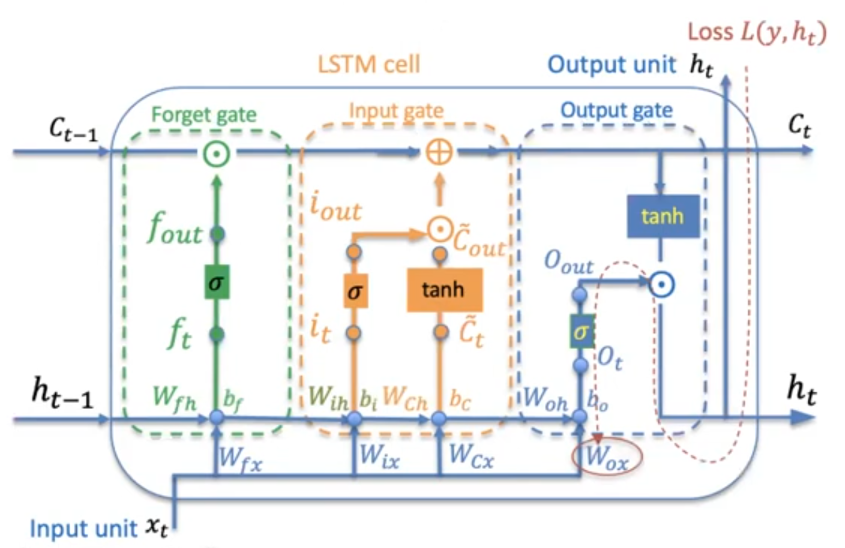

#### **LSTM Gate Update Equations**
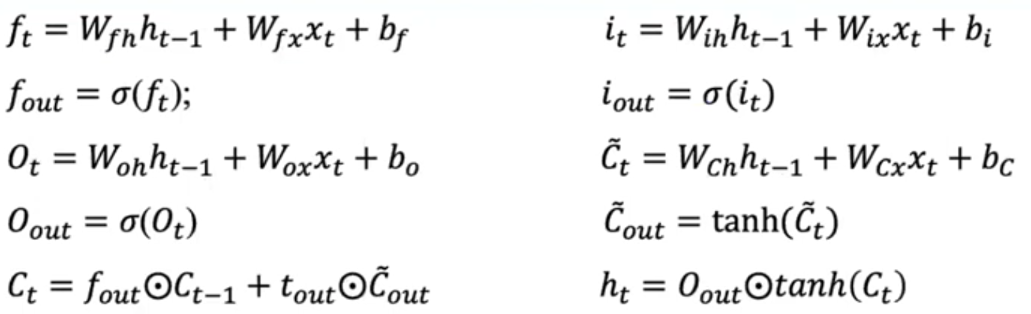

#### **Model Paramter Update**
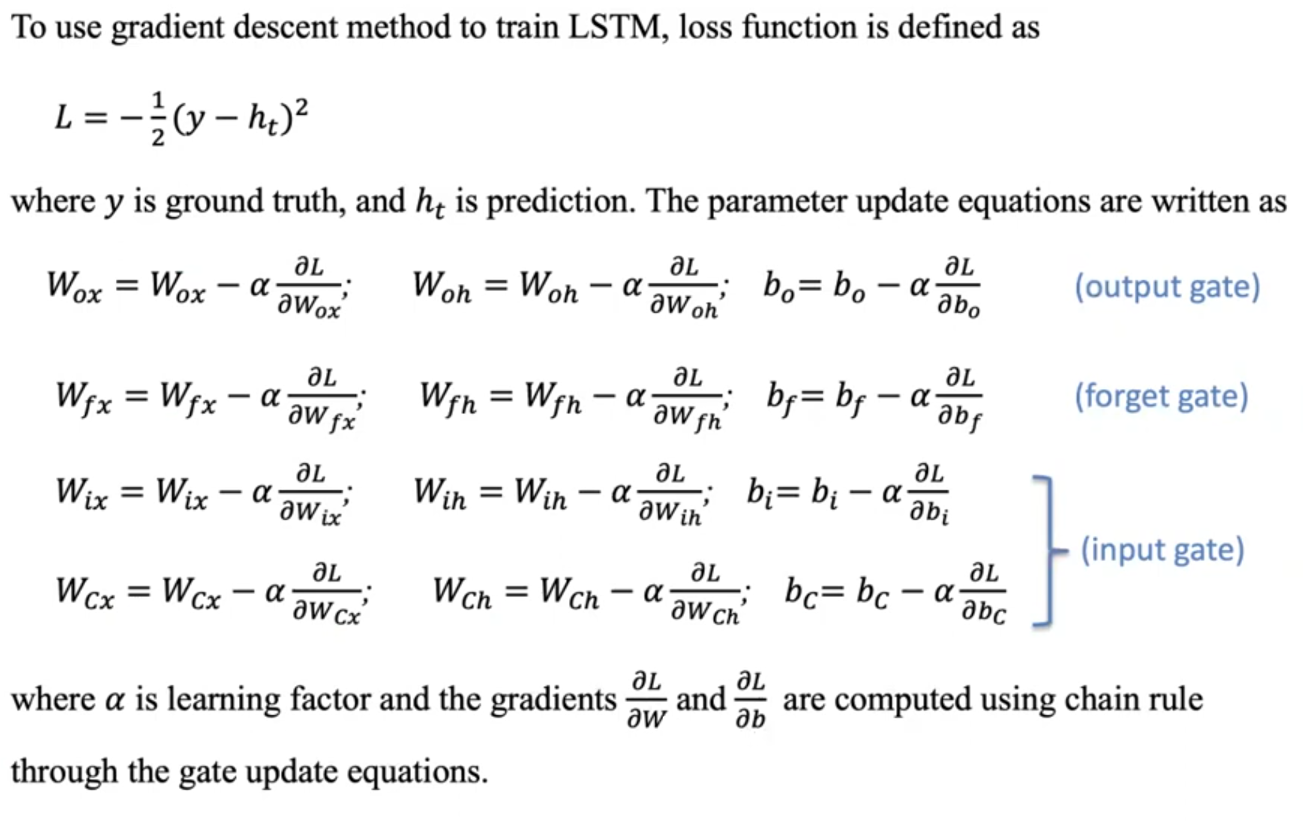

#### **Gradient Computation in BPTT**
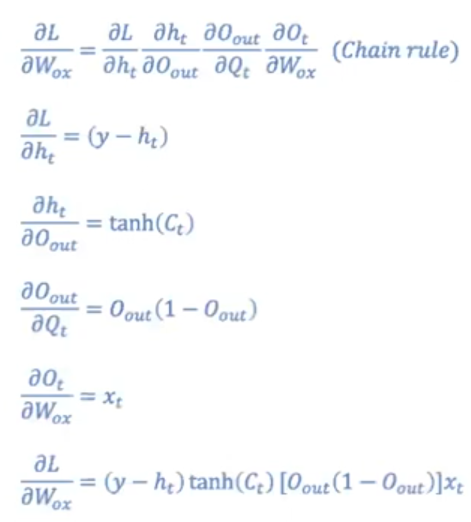

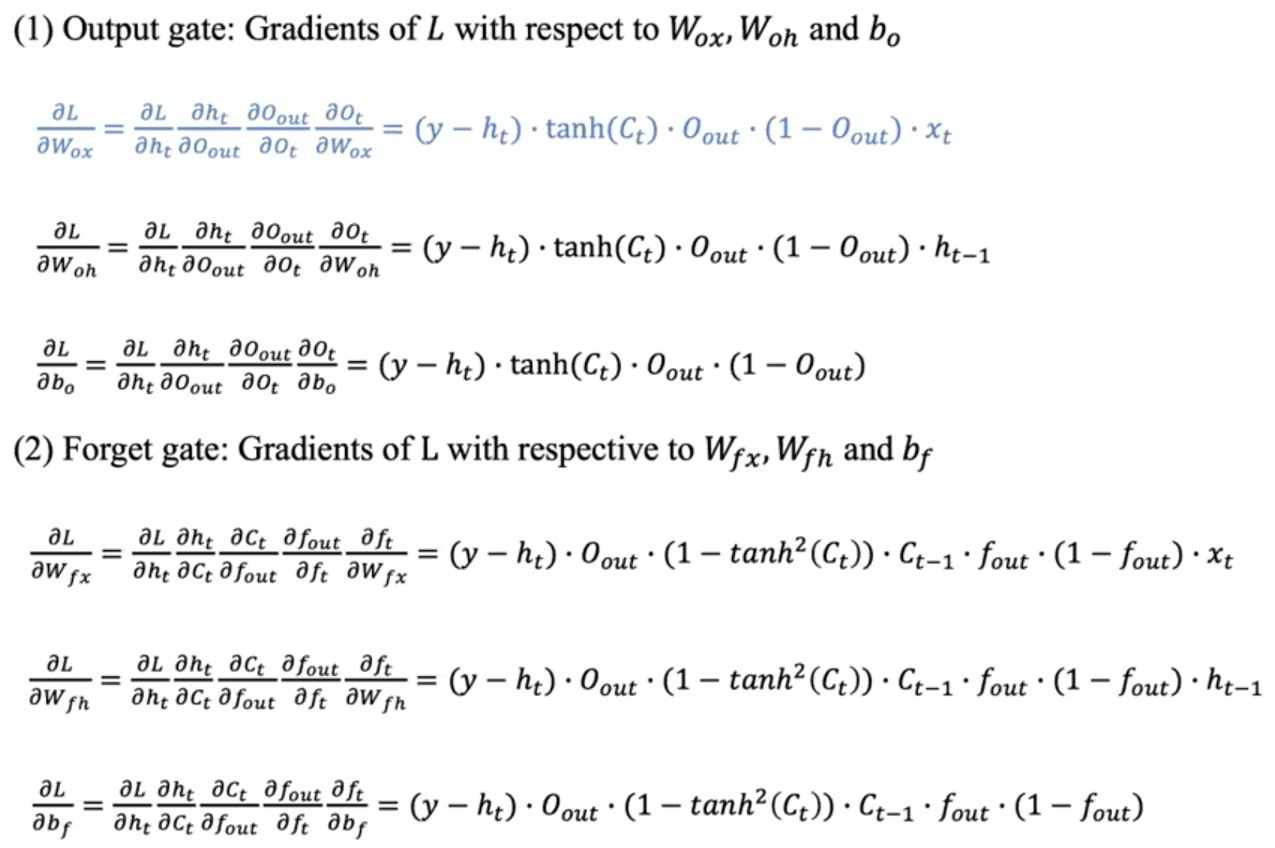
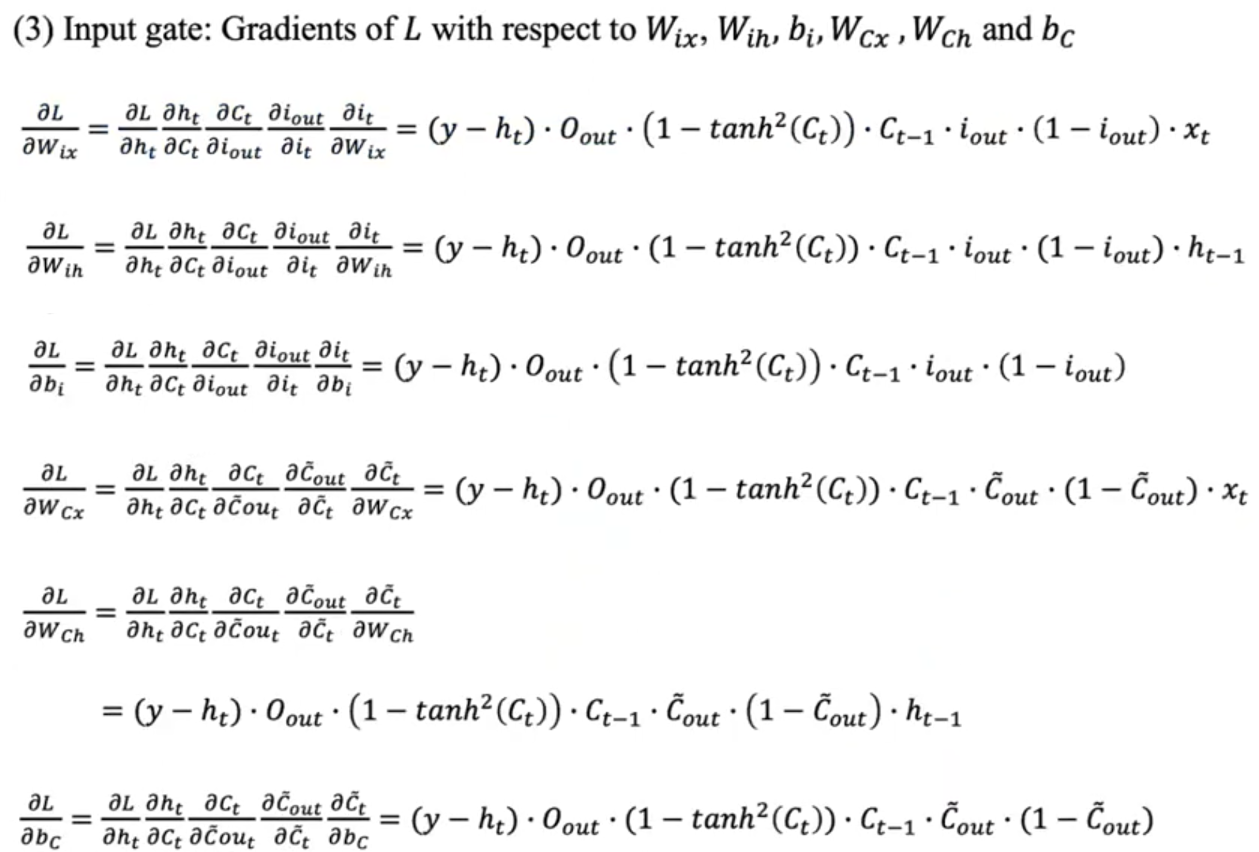

source: https://www.youtube.com/watch?v=qUT8-ILb0lg

### **The Example**

passed back fromLet us begin by defining out internal weights:
$$% <![CDATA[
\begin{aligned}
    W_{a} &= \begin{bmatrix} 0.45\\ 0.25 \end{bmatrix}, U_{a} = \begin{bmatrix} 0.15 \end{bmatrix}, b_{a} = \begin{bmatrix} 0.2 \end{bmatrix}\\
    W_{i} &= \begin{bmatrix} 0.95\\ 0.8 \end{bmatrix}, U_{i} = \begin{bmatrix} 0.8 \end{bmatrix}, b_{i} = \begin{bmatrix} 0.65 \end{bmatrix}\\
    W_{f} &= \begin{bmatrix} 0.7\\ 0.45 \end{bmatrix}, U_{f} = \begin{bmatrix} 0.1 \end{bmatrix}, b_{f} = \begin{bmatrix} 0.15 \end{bmatrix}\\
    W_{o} &= \begin{bmatrix} 0.6\\ 0.4 \end{bmatrix}, U_{o} = \begin{bmatrix} 0.25 \end{bmatrix}, b_{o} = \begin{bmatrix} 0.1 \end{bmatrix}
   \end{aligned} %]]>$$

And now input data:
$$% <![CDATA[
\begin{aligned}
    x_{0} &= \begin{bmatrix} 1\\ 2 \end{bmatrix} \text{ with label: } 0.5\\
    x_{1} &= \begin{bmatrix} 0.5\\ 3 \end{bmatrix} \text{ with label: } 1.25\\
   \end{aligned} %]]>$$

#### **Forward @ t=0**
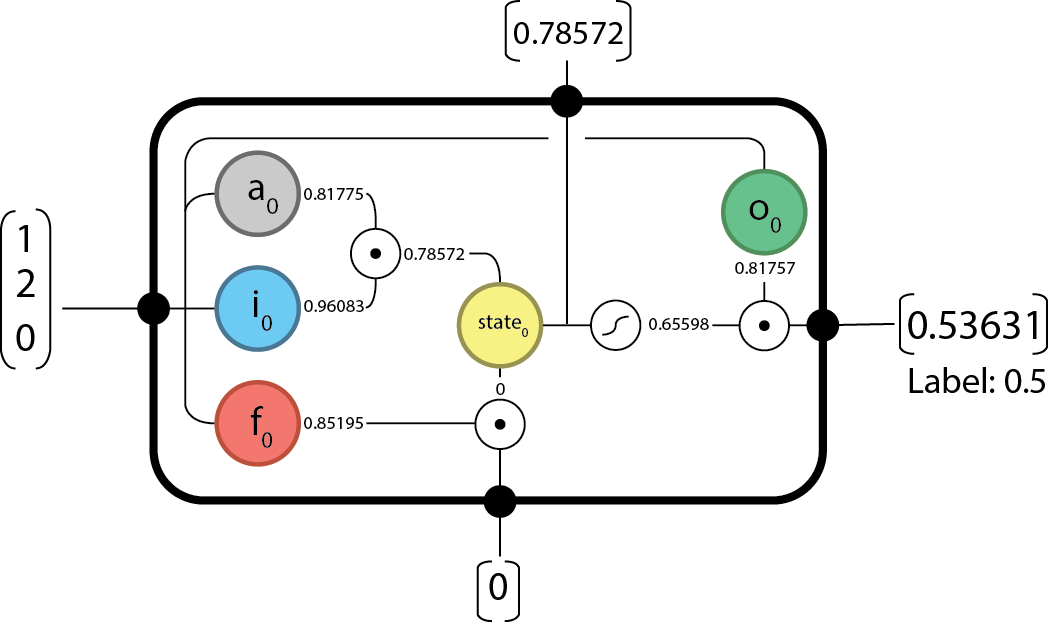

$$
% <![CDATA[
\begin{aligned}
    &a_{0} = \tanh(W_{a} \cdot x_{0} + U_{a} \cdot out_{-1} + b_{a}) = \tanh(\begin{bmatrix} 0.45\ 0.25 \end{bmatrix} \begin{bmatrix} 1\\ 2 \end{bmatrix} + \begin{bmatrix} 0.15 \end{bmatrix} \begin{bmatrix} 0 \end{bmatrix} + \begin{bmatrix} 0.2 \end{bmatrix}) = 0.81775\\
    &i_{0} = \sigma(W_{i} \cdot x_{0} + U_{i} \cdot out_{-1} + b_{i}) = \sigma(\begin{bmatrix} 0.95\ 0.8 \end{bmatrix} \begin{bmatrix} 1\\ 2 \end{bmatrix} + \begin{bmatrix} 0.8 \end{bmatrix} \begin{bmatrix} 0 \end{bmatrix} + \begin{bmatrix} 0.65 \end{bmatrix}) = 0.96083\\
    &f_{0} = \sigma(W_{f} \cdot x_{0} + U_{f} \cdot out_{-1} + b_{f}) = \sigma(\begin{bmatrix} 0.7\ 0.45 \end{bmatrix} \begin{bmatrix} 1\\ 2 \end{bmatrix} + \begin{bmatrix} 0.1 \end{bmatrix} \begin{bmatrix} 0 \end{bmatrix} + \begin{bmatrix} 0.15 \end{bmatrix}) = 0.85195\\
    &o_{0} = \sigma(W_{o} \cdot x_{0} + U_{o} \cdot out_{-1} + b_{o}) = \sigma(\begin{bmatrix} 0.6\ 0.4 \end{bmatrix} \begin{bmatrix} 1\\ 2 \end{bmatrix} + \begin{bmatrix} 0.25 \end{bmatrix} \begin{bmatrix} 0 \end{bmatrix} + \begin{bmatrix} 0.1 \end{bmatrix}) = 0.81757\\
    \\
    &state_{0} = a_{0} \odot i_{0} + f_{0} \odot state_{-1} = 0.81775 \times 0.96083 + 0.85195 \times 0 = 0.78572 \\
    &out_{0} = \tanh(state_{0}) \odot o_{0} = \tanh(0.78572) \times 0.81757 = 0.53631
  \end{aligned} %]]>
$$

From here, we can pass forward our state and output and begin the next time-step.

#### **Forward @ t=1**
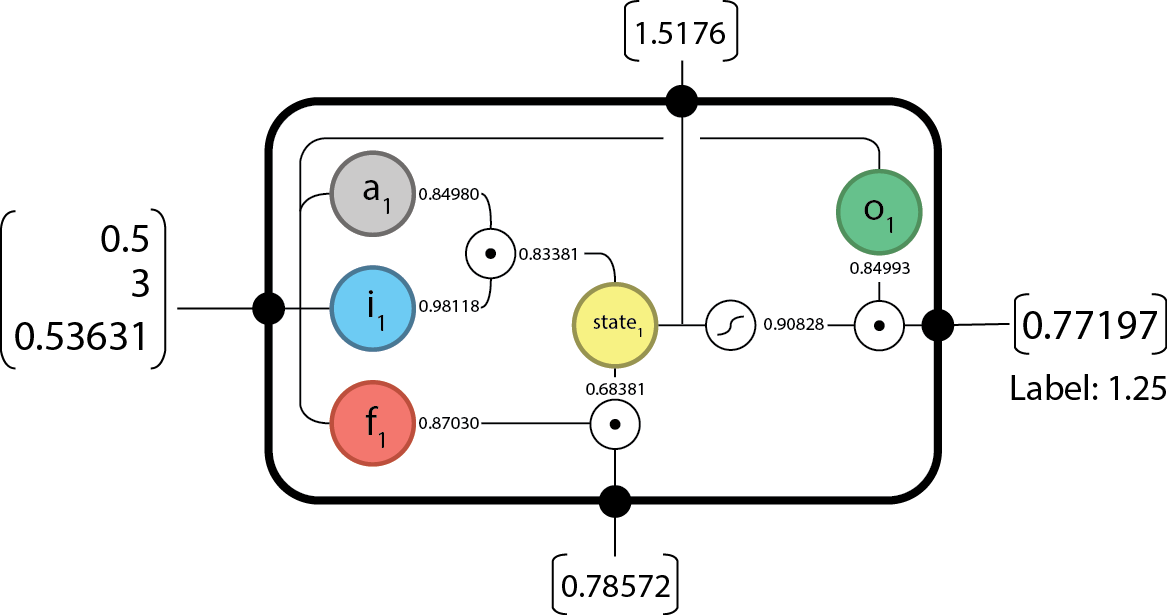

$$
% <![CDATA[
\begin{aligned}
    &a_{1} = \tanh(W_{a} \cdot x_{1} + U_{a} \cdot out_{0} + b_{a}) = \tanh(\begin{bmatrix} 0.45\ 0.25 \end{bmatrix} \begin{bmatrix} 0.5\\ 3 \end{bmatrix} + \begin{bmatrix} 0.15 \end{bmatrix} \begin{bmatrix} 0.53631 \end{bmatrix} + \begin{bmatrix} 0.2 \end{bmatrix}) = 0.84980\\
    &i_{1} = \sigma(W_{i} \cdot x_{1} + U_{i} \cdot out_{0} + b_{i}) = \sigma(\begin{bmatrix} 0.95\ 0.8 \end{bmatrix} \begin{bmatrix} 0.5\\ 3 \end{bmatrix} + \begin{bmatrix} 0.8 \end{bmatrix} \begin{bmatrix} 0.53631 \end{bmatrix} + \begin{bmatrix} 0.65 \end{bmatrix}) = 0.98118\\
    &f_{1} = \sigma(W_{f} \cdot x_{1} + U_{f} \cdot out_{0} + b_{f}) = \sigma(\begin{bmatrix} 0.7\ 0.45 \end{bmatrix} \begin{bmatrix} 0.5\\ 3 \end{bmatrix} + \begin{bmatrix} 0.1 \end{bmatrix} \begin{bmatrix} 0.53631 \end{bmatrix} + \begin{bmatrix} 0.15 \end{bmatrix}) = 0.87030\\
    &o_{1} = \sigma(W_{o} \cdot x_{1} + U_{o} \cdot out_{0} + b_{o}) = \sigma(\begin{bmatrix} 0.6\ 0.4 \end{bmatrix} \begin{bmatrix} 0.5\\ 3 \end{bmatrix} + \begin{bmatrix} 0.25 \end{bmatrix} \begin{bmatrix} 0.53631 \end{bmatrix} + \begin{bmatrix} 0.1 \end{bmatrix}) = 0.84993\\
    \\
    &state_{1} = a_{1} \odot i_{1} + f_{1} \odot state_{0} = 0.84980 \times 0.98118 + 0.87030 \times 0.78572 = 1.5176 \\
    &out_{1} = \tanh(state_{1}) \odot o_{1} = \tanh(1.5176) \times 0.84993 = 0.77197
  \end{aligned} %]]>
$$

And since we’re done our sequence we have everything we need to begin backpropogating.

#### **Backward @ t=1**
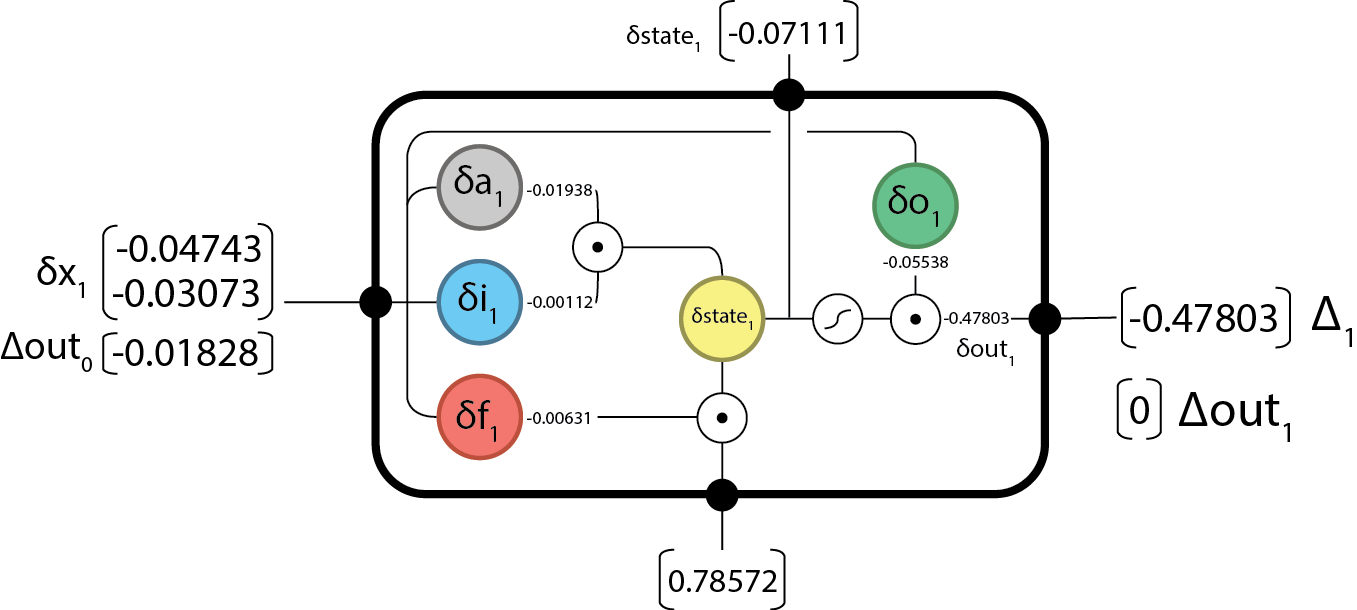

First we’ll need to compute the difference in output from the expected (label).

**Note** for this we’ll be using L2 Loss: $E(x, \hat x) = \dfrac{(x - \hat x)^{2}}{2}$. The derivate w.r.t. $x$ is $\partial_{x}E(x, \hat x) = x - \hat x$.

$$
% <![CDATA[
\begin{aligned}
  \Delta_{1} &= \partial_{x}E = 0.77197 - 1.25 = -0.47803\\
  \Delta out_{1} &= 0 \text{because there are no future time-steps.}\\
  \\
  \delta out_{1} &= \Delta_{1} + \Delta out_{1} = -0.47803 + 0 = -0.47803\\
  \delta state_{1} &= \delta out_{1} \odot o_{1} \odot (1 - \tanh^{2}(state_{1})) + \delta state_{2} \odot f_{2} = -0.47803 \times 0.84993 \times (1 - \tanh^{2}(1.5176)) + 0 \times 0 = -0.07111\\
  \\
  \delta a_{1} &= \delta state_{1} \odot i_{1} \odot (1 - a_{1}^{2}) = -0.07111 \times 0.98118 \times (1 - 0.84980^{2}) = -0.01938\\
  \delta i_{1} &= \delta state_{1} \odot a_{1} \odot i_{1} \odot (1 - i_{1}) = -0.07111 \times 0.84980 \times 0.98118 \times (1 - 0.98118) = -0.00112\\
  \delta f_{1} &= \delta state_{1} \odot state_{0} \odot f_{1} \odot (1 - f_{1}) = -0.07111 \times 0.78572 \times 0.87030 \times (1 - 0.87030) = -0.00631\\
  \delta o_{1} &= \delta out_{1} \odot \tanh(state_{1}) \odot o_{1} \odot (1 - o_{1}) = -0.47803 \times \tanh(1.5176) \times 0.84993 \times (1 - 0.84993) = -0.05538\\
  \\
  \delta x_{1} &= W^{T} \cdot \delta gates_{1}\\
               &= \begin{bmatrix} 0.45 \ 0.95 \ 0.70 \ 0.60 \\ 0.25 \ 0.80 \ 0.45 \ 0.40\end{bmatrix} \begin{bmatrix} -0.01938 \\ -0.00112 \\ -0.00631 \\ -0.05538\end{bmatrix} = \begin{bmatrix} -0.04743 \\ -0.03073 \end{bmatrix}\\
  \Delta out_{0} &= U^{T} \cdot \delta gates_{1}\\
                 &= \begin{bmatrix} 0.15 \ 0.80 \ 0.10 \ 0.25 \end{bmatrix} \begin{bmatrix} -0.01938 \\ -0.00112 \\ -0.00631 \\ -0.05538\end{bmatrix} = -0.01828\\
   \end{aligned} %]]>
$$

Now we can pass back our $\Delta out_{0}$ and continue on computing…

#### **Backward @ t=0**
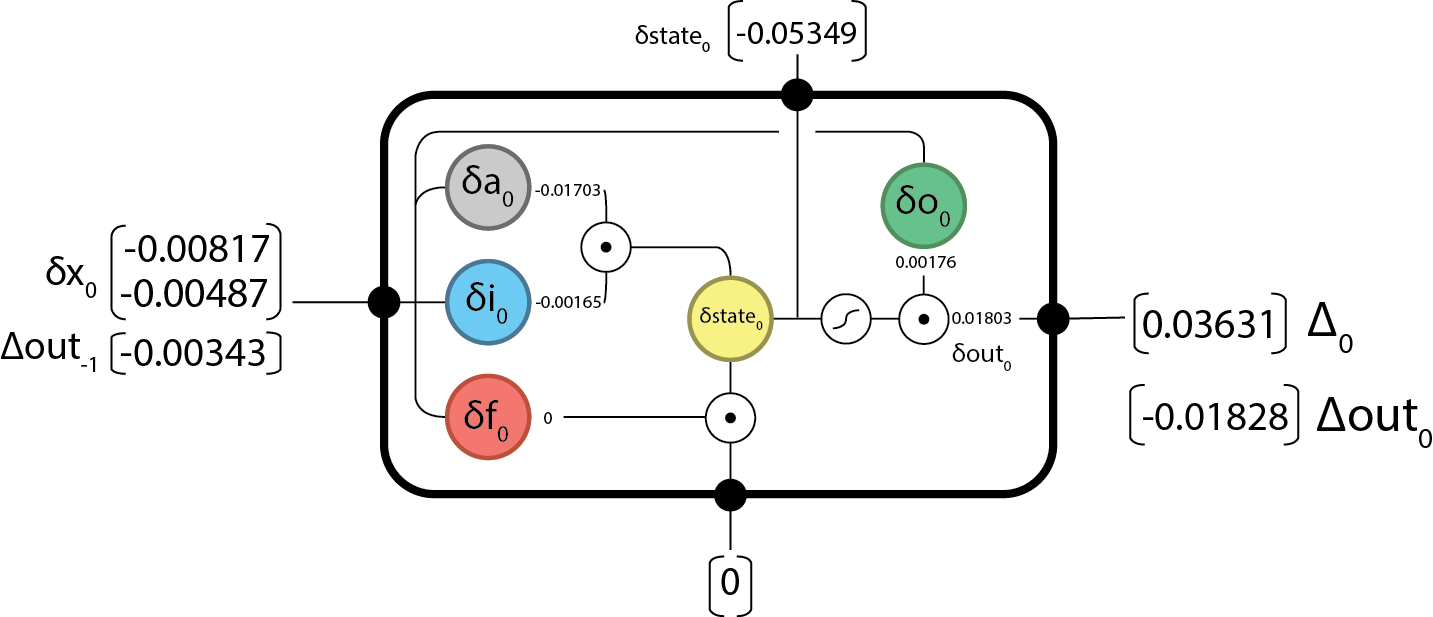

$$
% <![CDATA[
\begin{aligned}
  \Delta_{0} &= \partial_{x}E = 0.53631 - 0.5 = 0.03631\\
  \Delta out_{0} &= -0.01828, \text{ passed back from T=1}\\
  \\
  \delta out_{0} &= \Delta_{0} + \Delta out_{0} = 0.03631 + -0.01828 = 0.01803\\
  \delta state_{0} &= \delta out_{0} \odot o_{0} \odot (1 - \tanh^{2}(state_{0})) + \delta state_{1} \odot f_{1} = 0.01803 \times 0.81757 \times (1 - \tanh^{2}(0.78572)) + -0.07111 \times 0.87030 = -0.05349\\
  \delta a_{0} &= \delta state_{0} \odot i_{0} \odot (1 - a_{0}^{2}) = -0.05349 \times 0.96083 \times (1 - 0.81775^{2}) = -0.01703\\
  \delta i_{0} &= \delta state_{0} \odot a_{0} \odot i_{0} \odot (1 - i_{0}) = -0.05349 \times 0.81775 \times 0.96083 \times (1 - 0.96083) = -0.00165\\
  \delta f_{0} &= \delta state_{0} \odot state_{-1} \odot f_{0} \odot (1 - f_{0}) = -0.05349 \times 0 \times 0.85195 \times (1 - 0.85195) = 0\\
  \delta o_{0} &= \delta out_{0} \odot \tanh(state_{0}) \odot o_{0} \odot (1 - o_{0}) = 0.01803 \times \tanh(0.78572) \times 0.81757 \times (1 - 0.81757) = 0.00176\\
  \\
  \delta x_{0} &= W^{T} \cdot \delta gates_{0}\\
               &= \begin{bmatrix} 0.45 \ 0.95 \ 0.70 \ 0.60 \\ 0.25 \ 0.80 \ 0.45 \ 0.40\end{bmatrix} \begin{bmatrix} -0.01703 \\ -0.00165 \\ 0 \\ 0.00176 \end{bmatrix} = \begin{bmatrix} -0.00817 \\ -0.00487 \end{bmatrix}\\
  \Delta out_{-1} &= U^{T} \cdot \delta gates_{0}\\
                 &= \begin{bmatrix} 0.15 \ 0.80 \ 0.10 \ 0.25 \end{bmatrix} \begin{bmatrix} -0.01703 \\ -0.00165 \\ 0 \\ 0.00176 \end{bmatrix} = -0.00343\\
   \end{aligned} %]]>
$$

And we’re done the backward step!

Now we’ll need to update our internal parameters according to whatever solving algorithm we’ve chosen. I’m going to use a simple Stochastic Gradient Descent (SGD) update with learning rate: $\lambda = 0.1$.

We’ll need to compute how much our weights are going to change by:
$$
% <![CDATA[
\begin{aligned}
  \delta W &= \sum\limits^{T}_{t=0} \delta gates_{t} \otimes x_{t}\\
           &= \begin{bmatrix} -0.01703 \\ -0.00165 \\ 0 \\ 0.00176 \end{bmatrix} \begin{bmatrix} 1.0 \ 2.0 \end{bmatrix} + \begin{bmatrix} -0.01938 \\ -0.00112 \\ -0.00631 \\ -0.05538\end{bmatrix} \begin{bmatrix} 0.5 \ 3.0 \end{bmatrix} = \begin{bmatrix} -0.02672 \ -0.0922 \\ -0.00221 \ -0.00666 \\ -0.00316 \ -0.01893 \\ -0.02593 \ -0.16262 \end{bmatrix}\\
  \delta U &= \sum\limits^{T-1}_{t=0} \delta gates_{t+1} \otimes out_{t}\\
           &= \begin{bmatrix} -0.01938 \\ -0.00112 \\ -0.00631 \\ -0.05538\end{bmatrix} \begin{bmatrix} 0.53631 \end{bmatrix} = \begin{bmatrix} -0.01039 \\ -0.00060 \\ -0.00338 \\ -0.02970 \end{bmatrix}\\
  \delta b &= \sum\limits^{T}_{t=0} \delta gates_{t+1}\\
           &= \begin{bmatrix} -0.01703 \\ -0.00165 \\ 0 \\ 0.00176 \end{bmatrix} + \begin{bmatrix} -0.01938 \\ -0.00112 \\ -0.00631 \\ -0.05538\end{bmatrix} = \begin{bmatrix} -0.03641 \\ -0.00277 \\ -0.00631 \\ -0.05362 \end{bmatrix}
   \end{aligned} %]]>
$$

And updating out parameters based on the SGD update function: \\
$W^{new} = W^{old} - \lambda * \delta W^{old}$ we get our new weight set:
$$
% <![CDATA[
\begin{aligned}
    W_{a} &= \begin{bmatrix} 0.45267\\ 0.25922 \end{bmatrix}, U_{a} = \begin{bmatrix} 0.15104 \end{bmatrix}, b_{a} = \begin{bmatrix} 0.20364 \end{bmatrix}\\
    W_{i} &= \begin{bmatrix} 0.95022\\ 0.80067 \end{bmatrix}, U_{i} = \begin{bmatrix} 0.80006 \end{bmatrix}, b_{i} = \begin{bmatrix} 0.65028 \end{bmatrix}\\
    W_{f} &= \begin{bmatrix} 0.70031\\ 0.45189 \end{bmatrix}, U_{f} = \begin{bmatrix} 0.10034 \end{bmatrix}, b_{f} = \begin{bmatrix} 0.15063 \end{bmatrix}\\
    W_{o} &= \begin{bmatrix} 0.60259\\ 0.41626 \end{bmatrix}, U_{o} = \begin{bmatrix} 0.25297 \end{bmatrix}, b_{o} = \begin{bmatrix} 0.10536 \end{bmatrix}
   \end{aligned} %]]>
$$

And that completes one iteration of solving an LSTM cell!

source: https://blog.aidangomez.ca/2016/04/17/Backpropogating-an-LSTM-A-Numerical-Example/

## [B]. You must explain all the codes in the notebook line by line in Part I. Then, you should improve the model's $R^2$ score (preds, y_test) in Part I. You should also explain all the codes line by line in Part II. Furthermore, you should improve the [Train Score 14.93 RMSE] and [Test Score: 46.19 RMSE] of the model in Part II.

### Part I

In this part, we will be using the example data from the Max Planck Institute for Biogeochemistry. The dataset is called the Jena Climate dataset. It contains measurements like temperature, humidity, and more, recorded every 10 minutes. You have a dataset with measures on weather data, and we try to predict the temperature 12 hours (72-time steps of 10 minutes) into the future.We will use only the temperature data and not the other variables. This may make the task slightly harder to accomplish. Note that it is possible to add other explanatory variables into an RNN. For forecasting tomorrow’s temperature, you may want to use not only today’s temperature but also today’s wind direction, wind speed, and humidity, for example. In this case, you could add a third dimension to the input data.

Reference : Advanced Forecasting with Python: With State-of-the-Art-Models Including LSTMs, Facebook’s Prophet, and Amazon’s DeepAR, Joos Korstanje, 2021

#### 1. Import libraries

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#### 2. Import our data.

In [ ]:
df = pd.read_csv(project_dir + 'jena_climate_2009_2016.csv')
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

#### 3. The next step is to delete all columns other than the temperature, as we are building a univariate model. Keeping only the temperature data.

In [ ]:
df = df[['T (degC)']]

#### 4. We apply the min-max scaler.

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

#### 5. We prepare our data and convert the list of lists to numpy array.We need to split the data into a shape in which we have sequences of past data and sequences of future data. We want to predict 72 steps into the future, and we’ll use 3*72 steps into the past. This is an arbitrary choice. You can try out using more or less past data.

In [ ]:
ylist = list(df['T'])

n_future = 64
n_past = 256
total_period = 320

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1



X_new = np.array(X_new)
y_new = np.array(y_new)

#### 6.We do train test split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(336184, 256)

In [ ]:
y_train.shape

(336184, 64)

#### 7. It takes a long time to run this model. The batch size of 2000 is provided for demonstration purposes. But you need to put a much smaller batch size. Note that The SimpleRNN layer needs an input format that is 3D, and the shape has to correspond to (n_samples, n_timesteps, n_features). This can be obtained using reshape.

In [ ]:
batch_size = 32

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

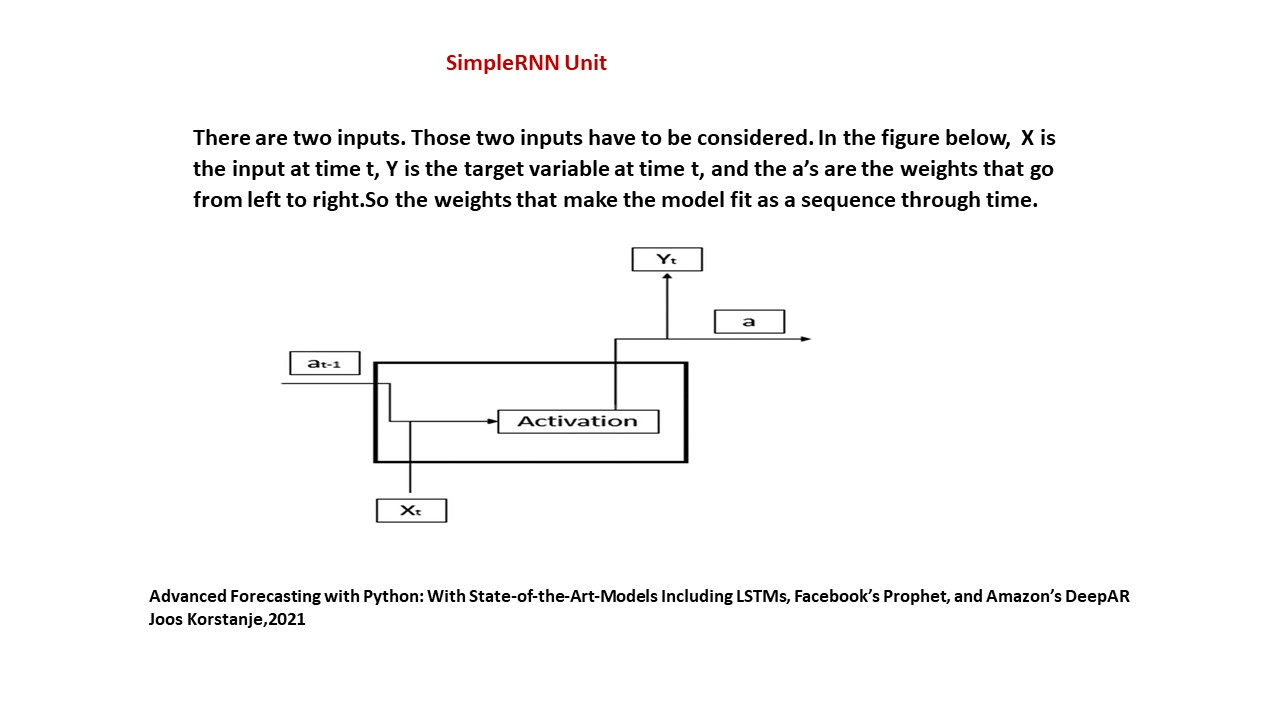

#### 8. We parameterize a small network with SimpleRNN.
Line 1: -------
Line 2: -------
Line 3:-------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256, 32)           1088      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256, 32)           2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
Total params: 7360 (28.75 KB)
Trainable params: 7360 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
8405/8405 [==============================] - 1476s 175ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - val_loss: 0.0310 - val_mean_absolut

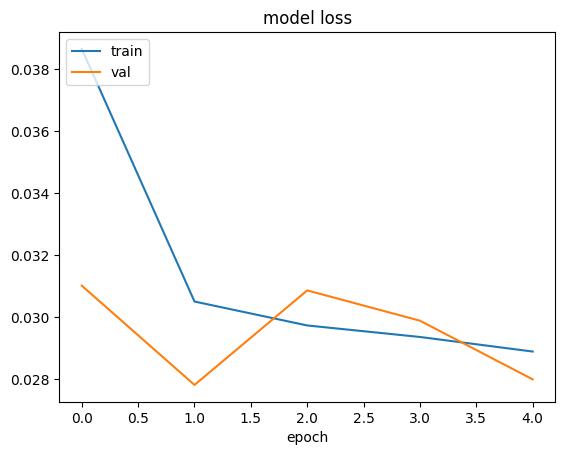

In [ ]:
random.seed(42)

simple_model = Sequential([
  SimpleRNN(32, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(32, activation='tanh', return_sequences = True),
  SimpleRNN(32, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.902988961667719


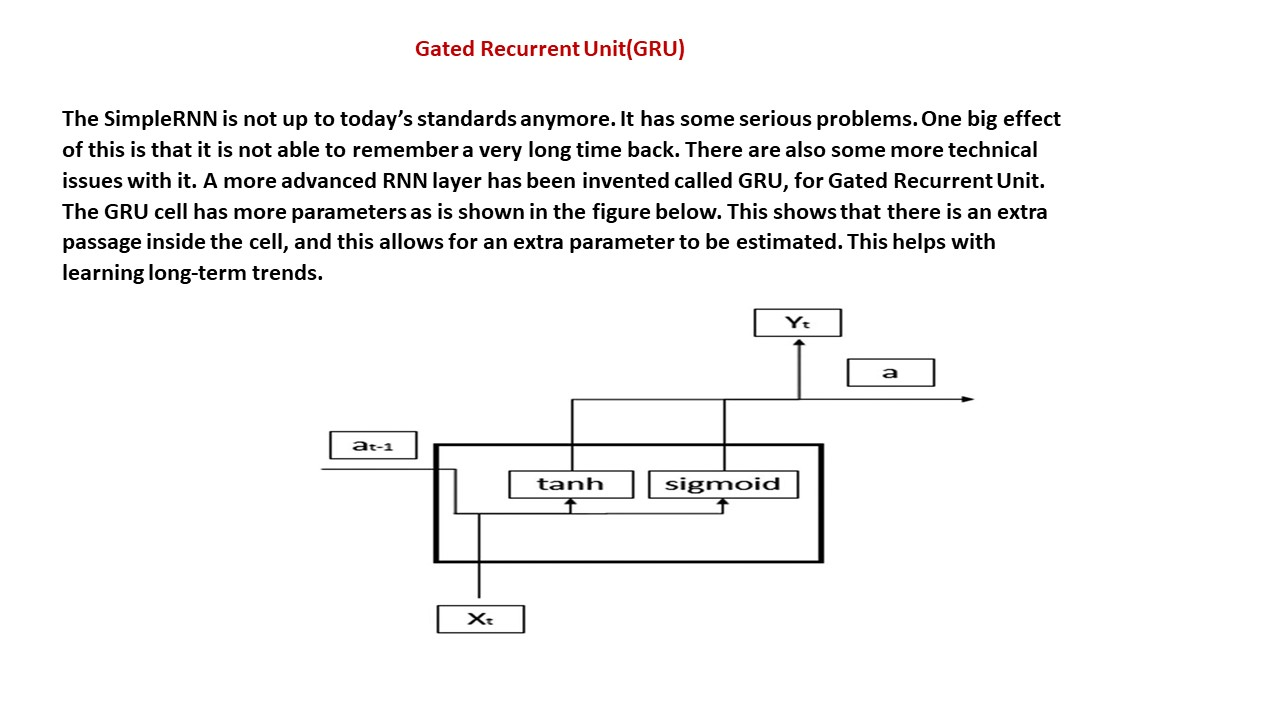

#### 9.A simple architecture with 1 Gated Recurrent Unit (GRU) layer.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 64)                576       
                                                                 
Total params: 840 (3.28 KB)
Trainable params: 840 (3.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
8405/8405 [==============================] - 719s 85ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 2/10
8405/8405 [==============================] - 706s 84ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261
Epoch 3/10
8405/8405 [==============================] - 700s 83ms/step - loss: 0.0

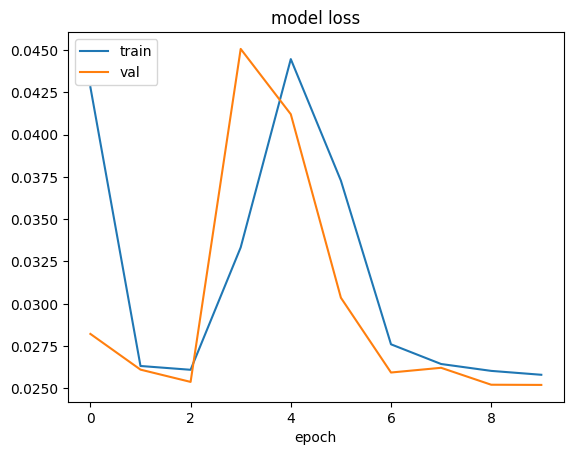

In [ ]:
random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
  GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.9339680843202345


#### 10. This is a  more complex network with three layers of Gated Recurrent Unit (GRU).

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 256, 64)           12864     
                                                                 
 gru_5 (GRU)                 (None, 256, 64)           24960     
                                                                 
 gru_6 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
Total params: 66944 (261.50 KB)
Trainable params: 66944 (261.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
8405/8405 [==============================] - 223s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - val_loss: 0.0273 - val_mean_ab

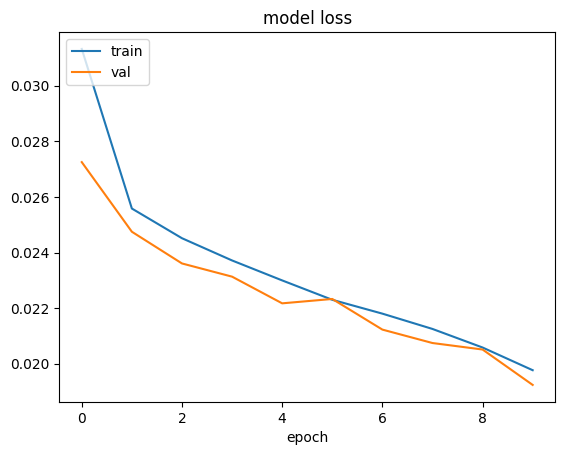

In [ ]:
random.seed(42)

simple_model = Sequential([
  GRU(64, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  GRU(64, activation='tanh', return_sequences=True),
  GRU(64, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(preds, y_test))

0.9596022732422231


### Part II

In this part, we will employ LSTM.This section uses the stock market data(SP500).

#### 1. Import libraries.

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

#### 2. We normalize the dataset and do train and test split.

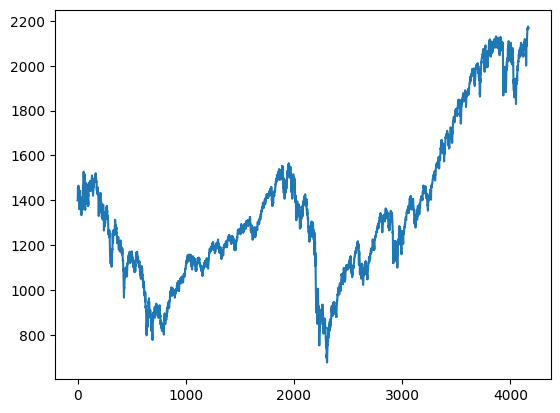

2791 1376


In [ ]:
dataset = pandas.read_csv(project_dir + 'sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
print(dataset)

[[0.48240909]
 [0.48420417]
 [0.48509838]
 ...
 [0.99562893]
 [0.99609603]
 [0.99436106]]


#### 3. We convert an array of values into a timeseries data.

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(2690, 100)

#### 4. We reshape input to be [samples, time steps, features].

In [ ]:
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

#### 5. We create and fit the LSTM network.

In [ ]:
model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
model.add(LSTM(64, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
85/85 - 6s - loss: 0.0186 - 6s/epoch - 75ms/step
Epoch 2/100
85/85 - 3s - loss: 4.8169e-04 - 3s/epoch - 38ms/step
Epoch 3/100
85/85 - 5s - loss: 4.1104e-04 - 5s/epoch - 56ms/step
Epoch 4/100
85/85 - 4s - loss: 3.8785e-04 - 4s/epoch - 41ms/step
Epoch 5/100
85/85 - 3s - loss: 3.6304e-04 - 3s/epoch - 38ms/step
Epoch 6/100
85/85 - 3s - loss: 3.3076e-04 - 3s/epoch - 38ms/step
Epoch 7/100
85/85 - 5s - loss: 3.3081e-04 - 5s/epoch - 61ms/step
Epoch 8/100
85/85 - 3s - loss: 3.1841e-04 - 3s/epoch - 38ms/step
Epoch 9/100
85/85 - 3s - loss: 2.9261e-04 - 3s/epoch - 38ms/step
Epoch 10/100
85/85 - 3s - loss: 2.8375e-04 - 3s/epoch - 39ms/step
Epoch 11/100
85/85 - 5s - loss: 2.7617e-04 - 5s/epoch - 59ms/step
Epoch 12/100
85/85 - 3s - loss: 2.7661e-04 - 3s/epoch - 38ms/step
Epoch 13/100
85/85 - 3s - loss: 2.6108e-04 - 3s/epoch - 38ms/step
Epoch 14/100
85/85 - 4s - loss: 2.8576e-04 - 4s/epoch - 43ms/step
Epoch 15/100
85/85 - 6s - loss: 2.5262e-04 - 6s/epoch - 66ms/step
Epoch 16/100
85/85 - 5s

#### 6. We rescale predicted values and compute the root mean squared error.

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

40/40 [==============================] - 1s 26ms/step
Train Score: 14.58 RMSE
Test Score: 17.24 RMSE


####7. We shift train and test predictions for plotting and plot baseline and predictions.The part in orange is the training data, the part in blue is the test data, and the part in green is the predicted output.

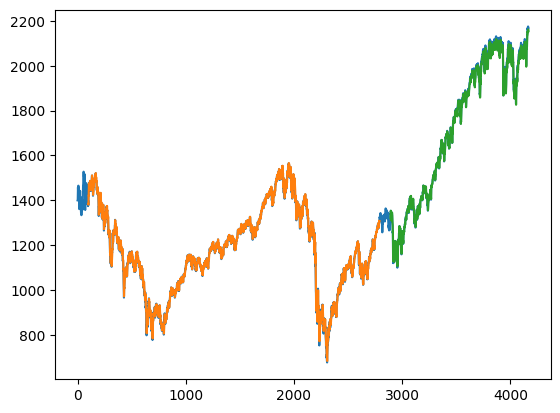

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Part III- Search Algorithms

## [A]. Provide two manual examples [sequence of tree processing using A* search] and write a python script for each example.

### A* search

The most common informed search algorithm is **A* search**, a best-first search that uses the evaluation function
$$f(n)=g(n)+h(n)$$
where $g(n)$ is the path cost from the initial state to node $n$, and $h(n)$ is the estimated cost of the shortest path from $n$ to a goal state, so we have
$$f(n)= \text{estimated cost of the best path that continues from n to a goal.}$$

source: Artificial Intelligence: A Modern Approach 4th Edition, Peter Norvig, Stuart Russell, Pearson, 2021

### Example 1

Imagine an agent enjoying a touring vacation in Romania. The agent wants to take in the sights, improve its Romanian, enjoy the nightlife, avoid hangovers, and so on. The decision problem is a complex one. Now, suppose the agent is currently in the city of Arad and has a nonrefundable ticket to fly out of Bucharest the following day. The agent observes street signs and sees that there are three roads leading out of Arad: one toward Sibiu, one to Timisoara, and one to Zerind. None of these are the goal, so unless the agent is familiar with the geography of Romania, it will not know which road to follow.

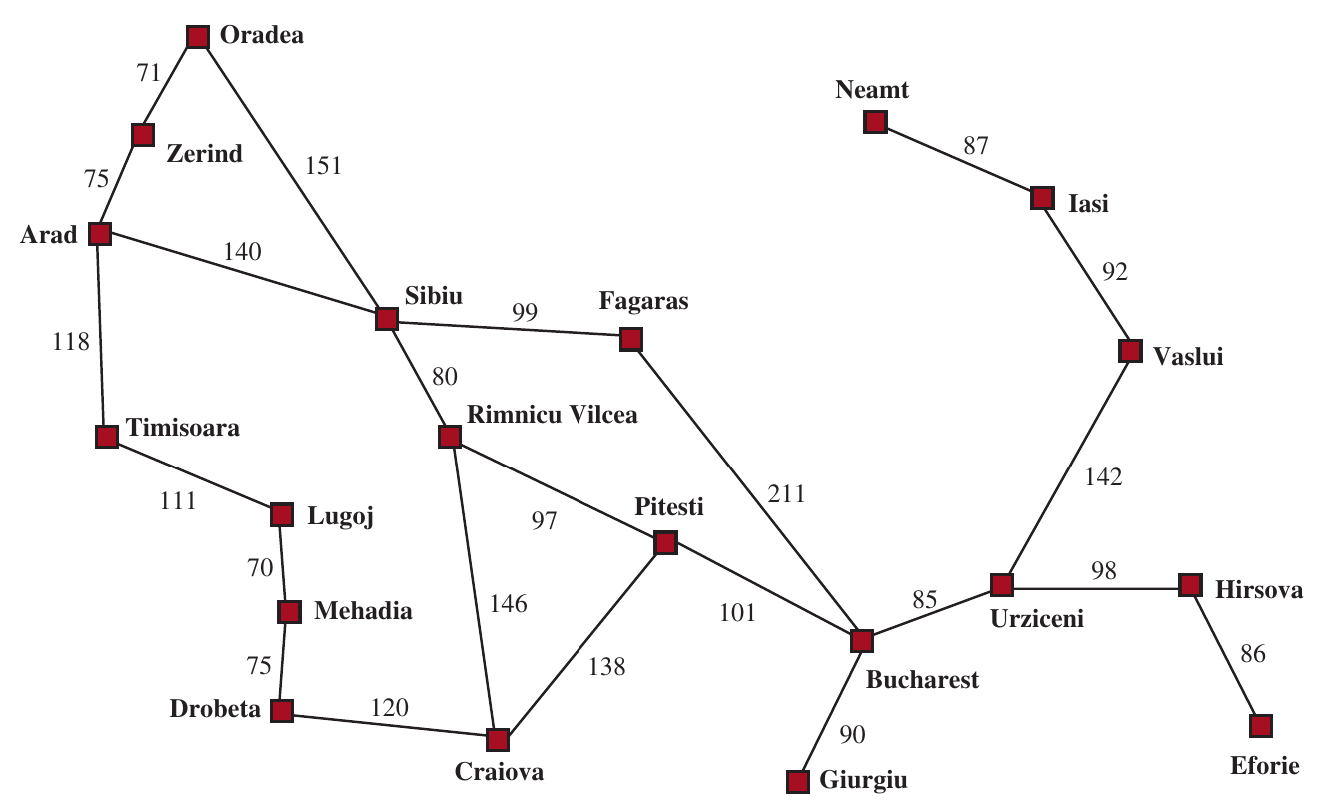

We can estimate the distance from the current state to
a goal by computing the straight-line distance on the map between the two points.

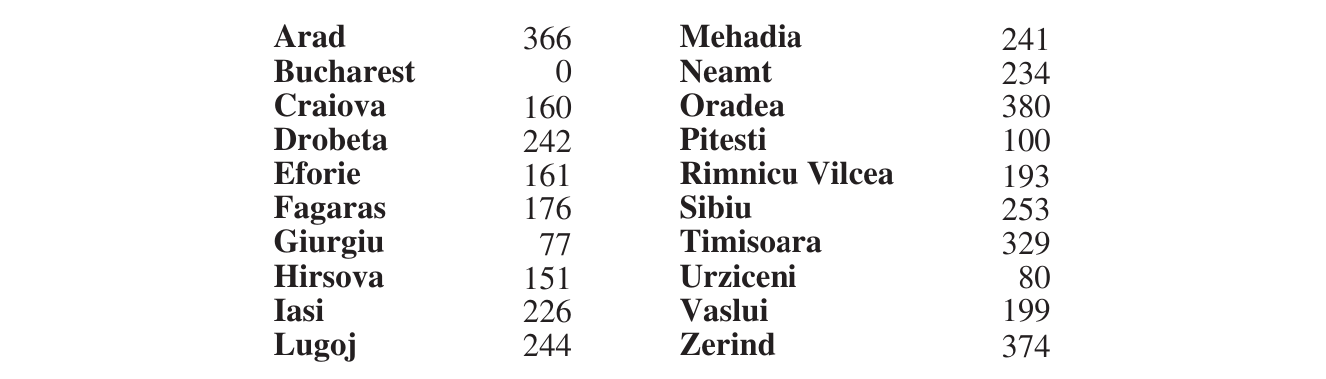

In figure below, we show the progress of an A* search with the goal of reaching Bucharest.

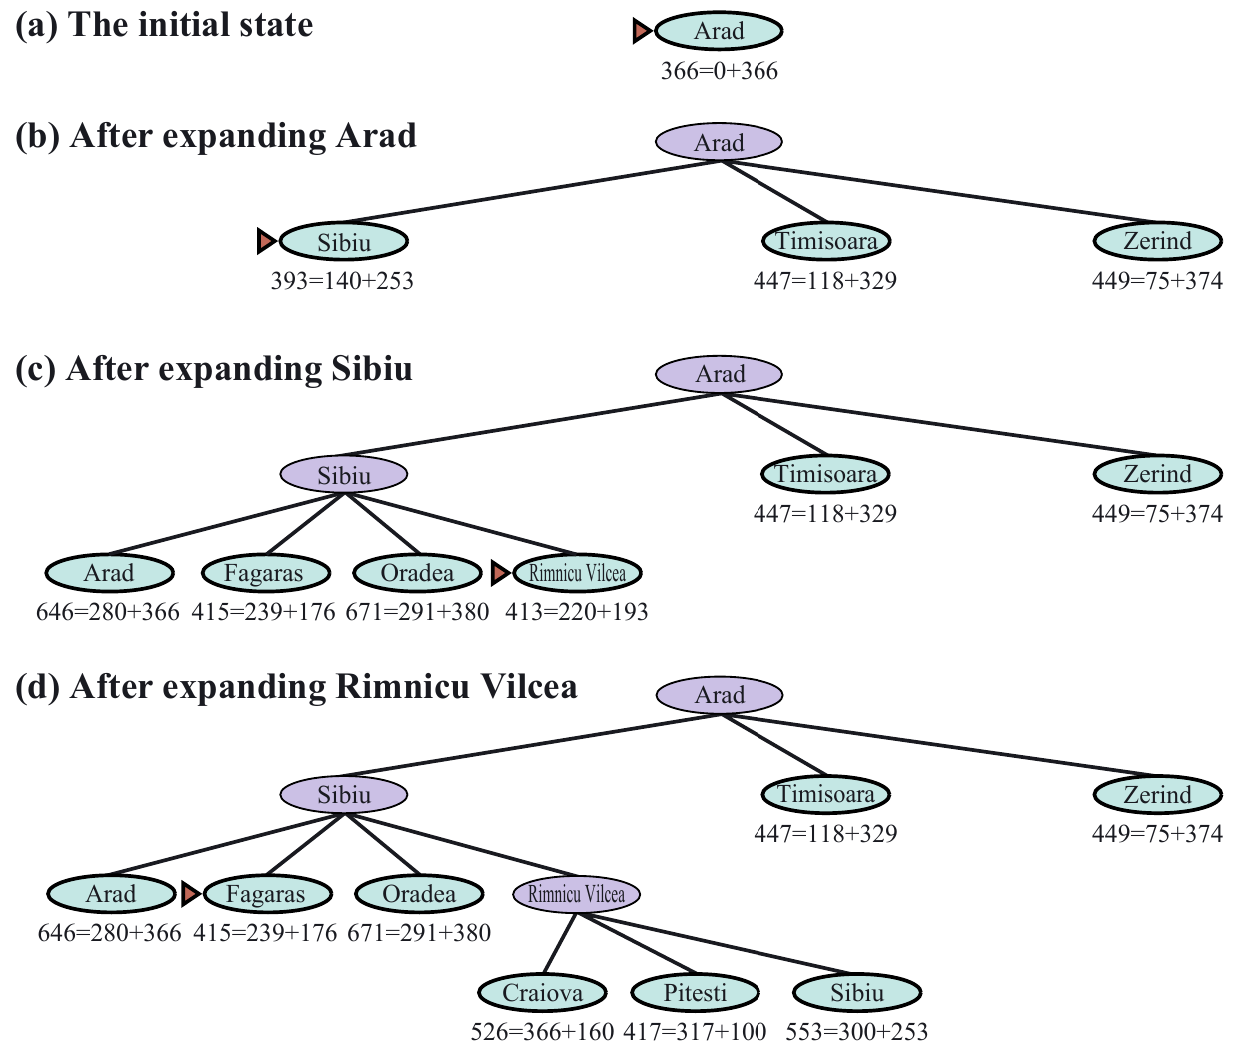

Notice that Bucharest first appears on the frontier at step (e), but it is not selected for expansion (and thus not detected as a solution) because at $f = 450$ it is not the lowest-cost node on the frontier—that would be Pitesti, at $f = 417$. Another way to say this is that there might be a solution through Pitesti whose cost is as low as 417, so the algorithm will not settle for a solution that costs 450. At step (f), a different path to Bucharest is now the lowest-cost node, at $f = 418$, so it is selected and detected as the optimal solution.

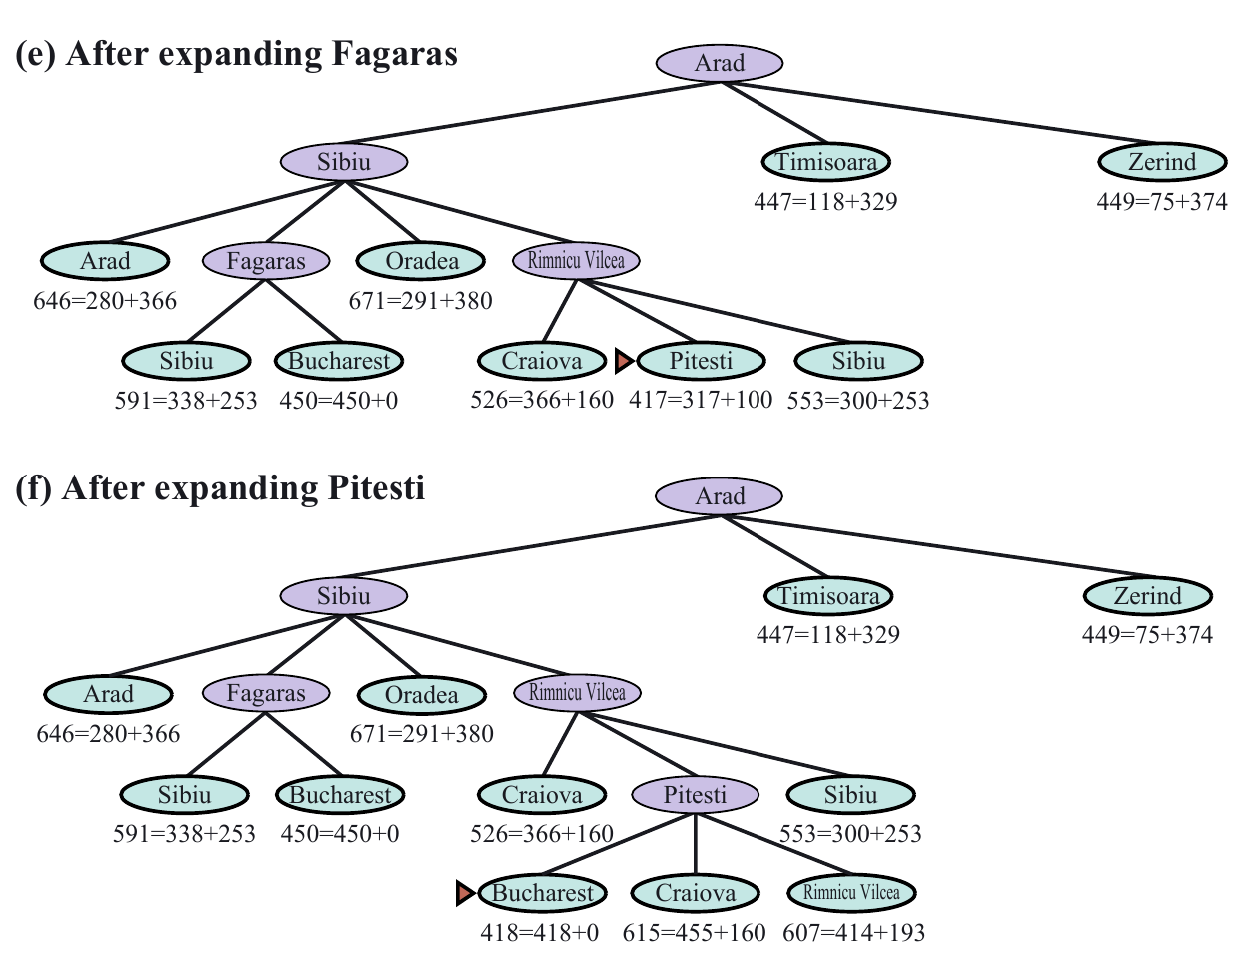

source: Artificial Intelligence: A Modern Approach 4th Edition, Peter Norvig, Stuart Russell, Pearson, 2021

#### code

In [ ]:
from collections import deque

class Graph:
    # example of adjacency list (or rather map)
    # adjacency_list = {
    # 'A': [('B', 1), ('C', 3), ('D', 7)],
    # 'B': [('D', 5)],
    # 'C': [('D', 12)]
    # }

    def __init__(self, adjacency_list, heuristic):
        self.adjacency_list = adjacency_list
        self.h = heuristic

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h[v] < g[n] + self.h[n]:
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [ ]:
adjacency_list = {
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Zerind': [('Oradea', 71), ('Arad', 75)],
    'Arad': [('Zerind', 75), ('Sibiu', 140), ('Timisoara', 118)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia': [('Lugoj', 70), ('Drobeta', 75)],
    'Drobeta': [('Mehadia', 75), ('Craiova', 120)],
    'Sibiu': [('Oradea', 151), ('Arad', 140), ('Rimnicu Vilcea', 80), ('Fagaras', 99)],
    'Rimnicu Vilcea': [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)],
    'Craiova': [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Pitesti': [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Bucharest': [('Fagaras', 211), ('Pitesti', 101), ('Giurgiu', 90), ('Urziceni', 85)],
    'Giurgiu': [('Bucharest', 90)],
    'Urziceni': [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
    'Hirsova': [('Urziceni', 98), ('Eforie', 86)],
    'Eforie': [('Hirsova', 86)],
    'Vaslui': [('Urziceni', 142), ('Iasi', 92)],
    'Iasi': [('Vaslui', 92), ('Neamt', 87)],
    'Neamt': [('Iasi', 87)]
}

heuristic = {
    'Arad': 366,
    'Mehadia': 241,
    'Bucharest': 0,
    'Neamt': 234,
    'Craiova': 160,
    'Oradea': 380,
    'Drobeta': 242,
    'Pitesti': 100,
    'Eforie': 161,
    'Rimnicu Vilcea': 193,
    'Fagaras': 176,
    'Sibiu': 253,
    'Giurgiu': 77,
    'Timisoara': 329,
    'Hirsova': 151,
    'Urziceni': 80,
    'Iasi': 226,
    'Vaslui': 199,
    'Lugoj': 244,
    'Zerind': 374
}

graph = Graph(adjacency_list, heuristic)
graph.a_star_algorithm('Arad', 'Bucharest');

Path found: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']


sources: https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/a-star-search-algorithm/

### Example 2

Consider the following example of trying to find the shortest path from **S** to **G** in the following graph:
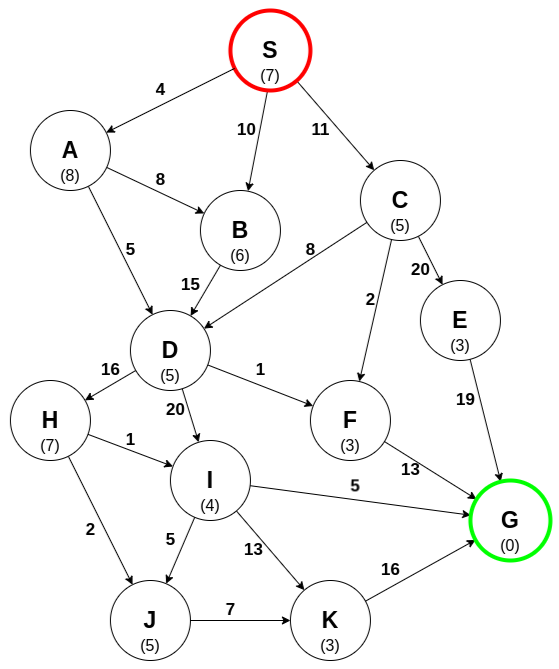

Each edge has an associated weight, and each node has a heuristic cost.

An open list is maintained in which the node **S** is the only node in the list. The search tree can now be constructed.

Exploring **S**:
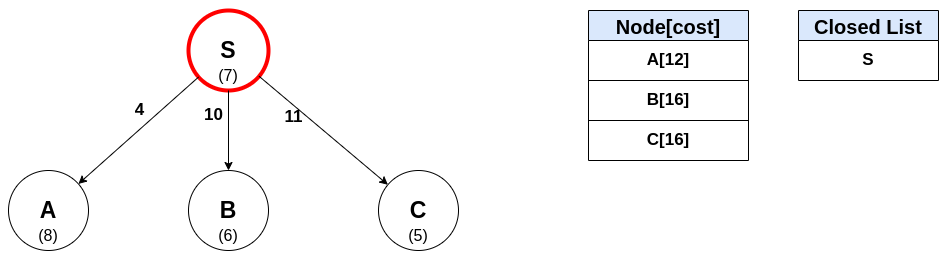

**A** is the current most promising path, so it is explored next:
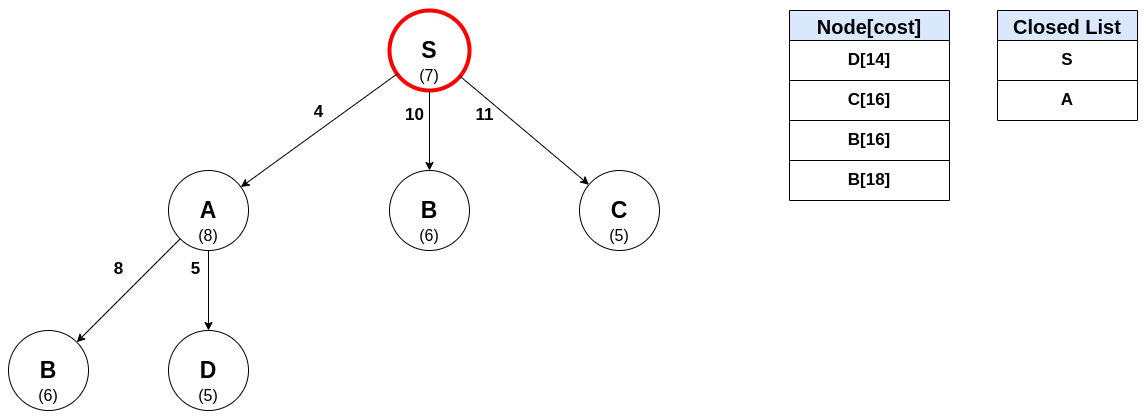

Exploring **D**:
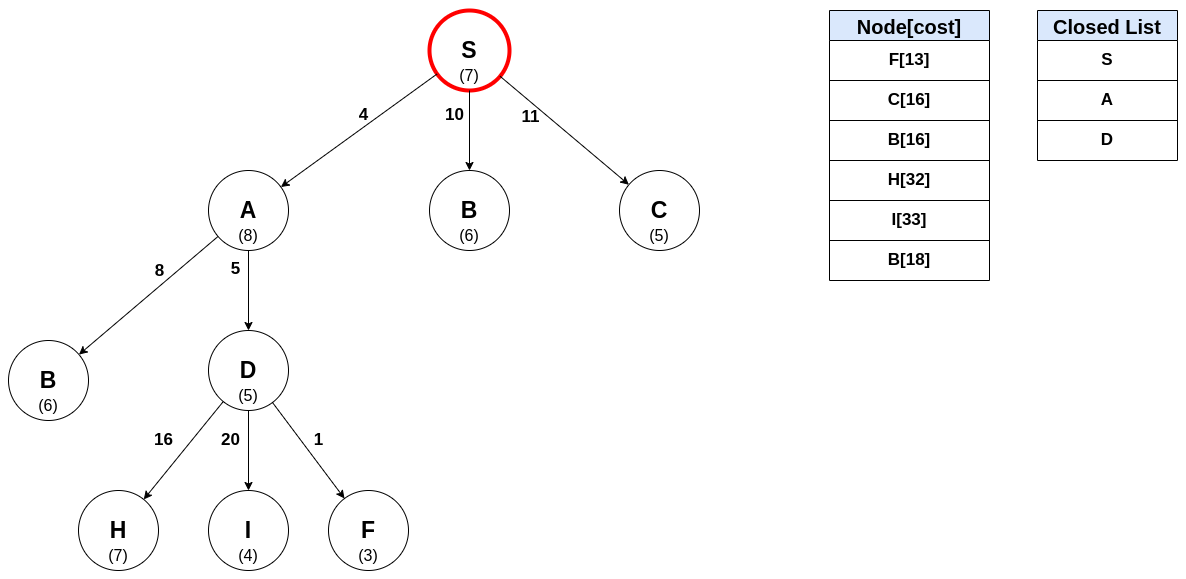

Exploring **F**:
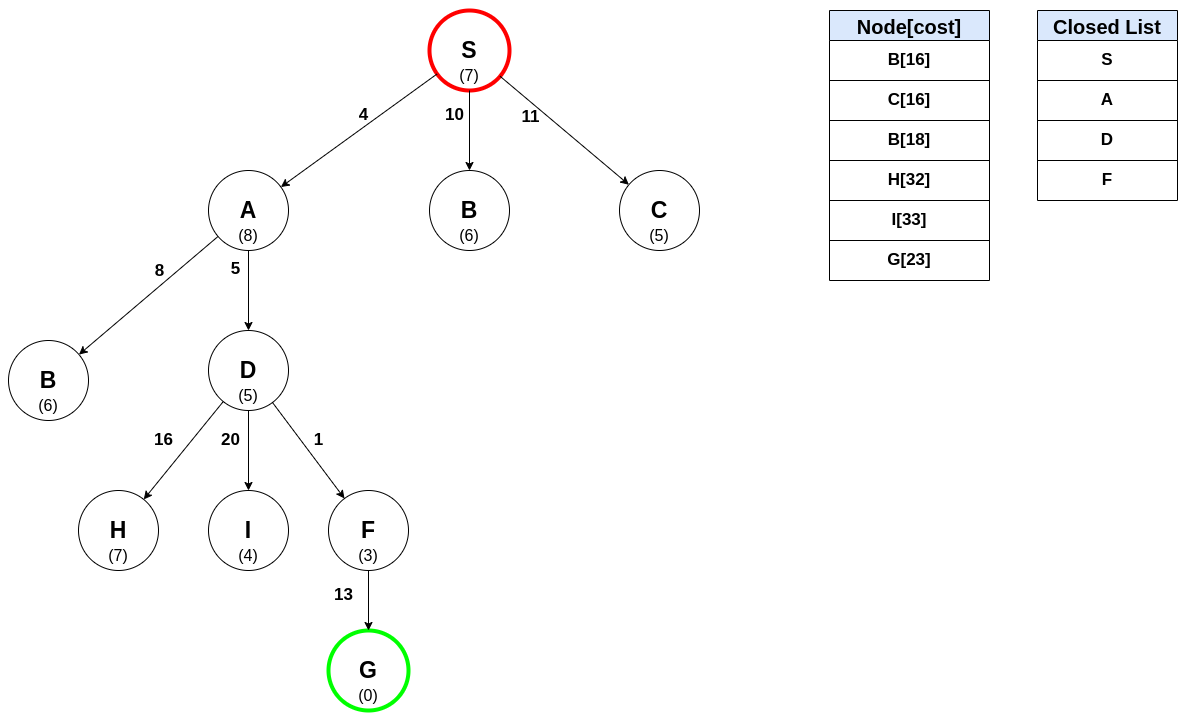

Notice that the goal node **G** has been found. However, it hasn’t been explored, so the algorithm continues because there may be a shorter path to **G**. The node **B** has two entries in the open list: one at a cost of 16 (child of **S**) and one at a cost of 18 (child of **A**). The one with the lowest cost is explored next:
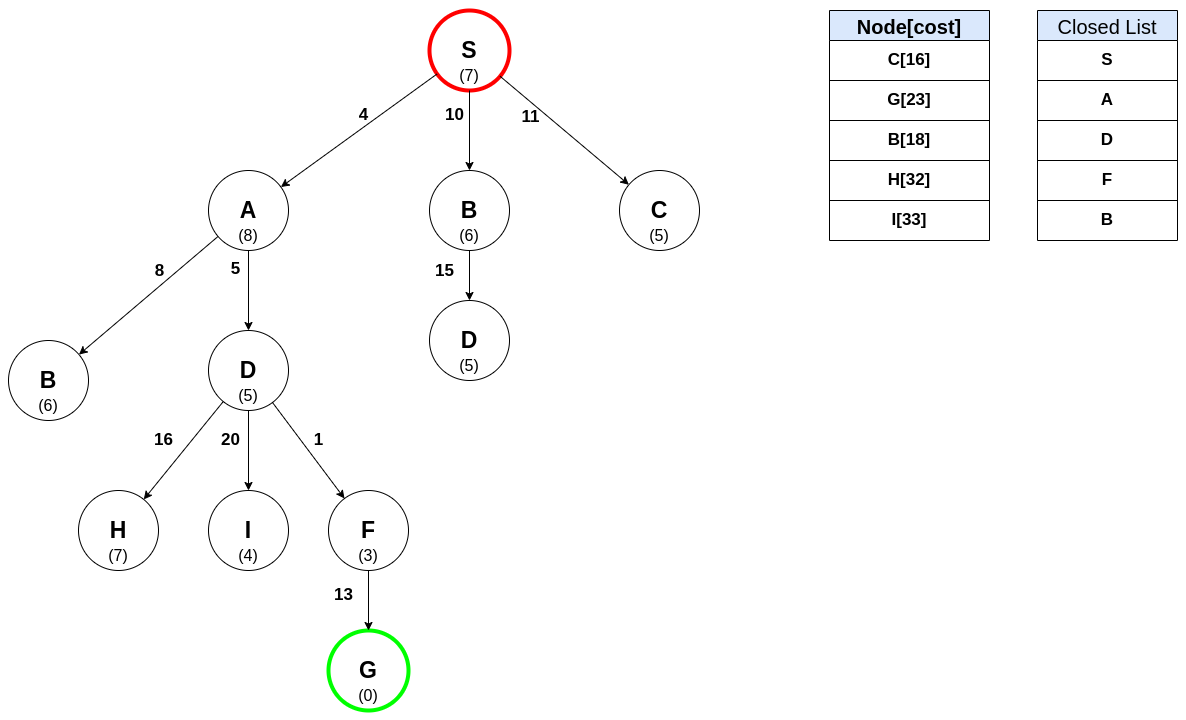

Exploring **C**:
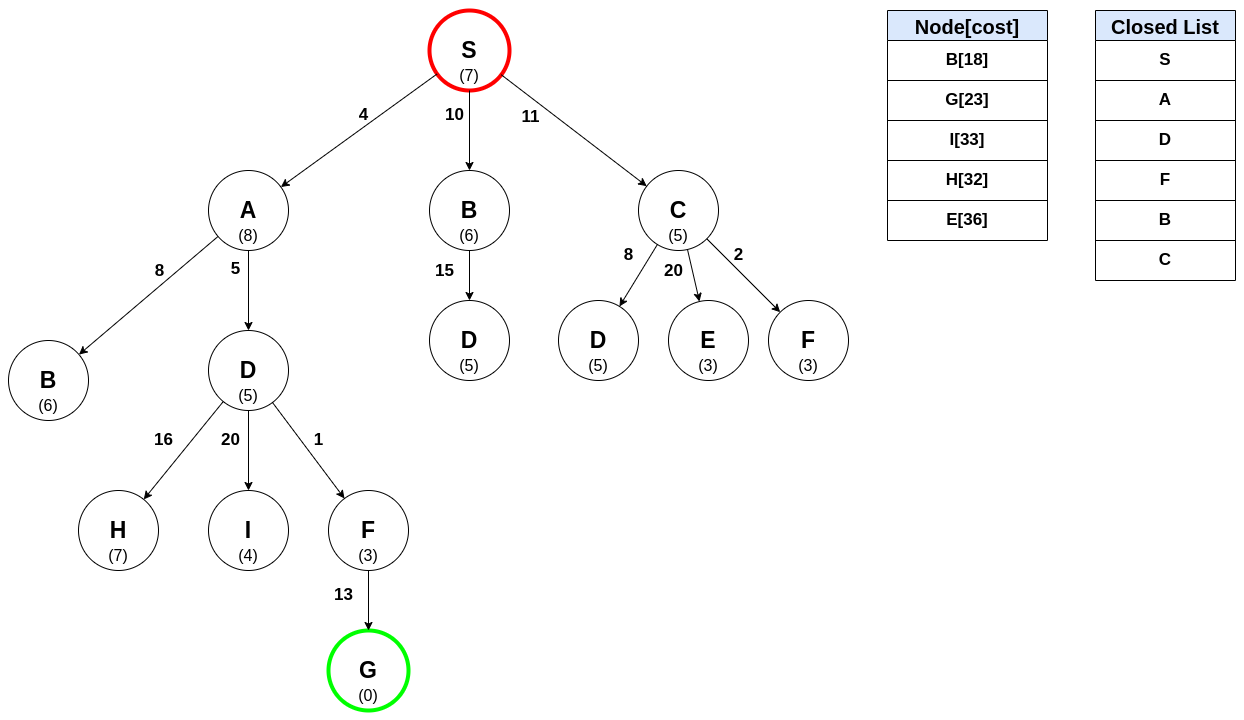

The next node in the open list is again **B**, but it has already been explored. So it should be checked if there is a shorter path to **B** or not. Because the first time, **B** was explred with the cost of 16, that is less than 18, so it doesn't need to be explored again.
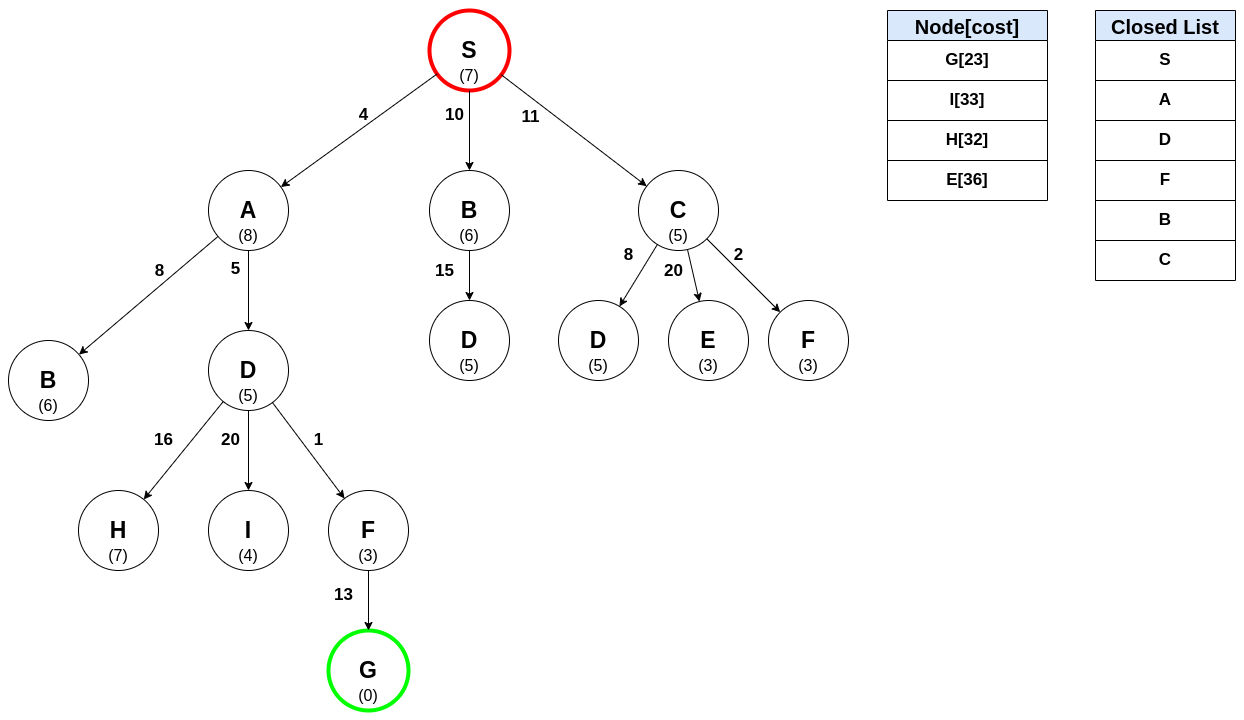

The next node to be explored is the goal node **G**, meaning the shortest path to **G** has been found! The path is constructed by tracing the graph backward from **G** to **S**:
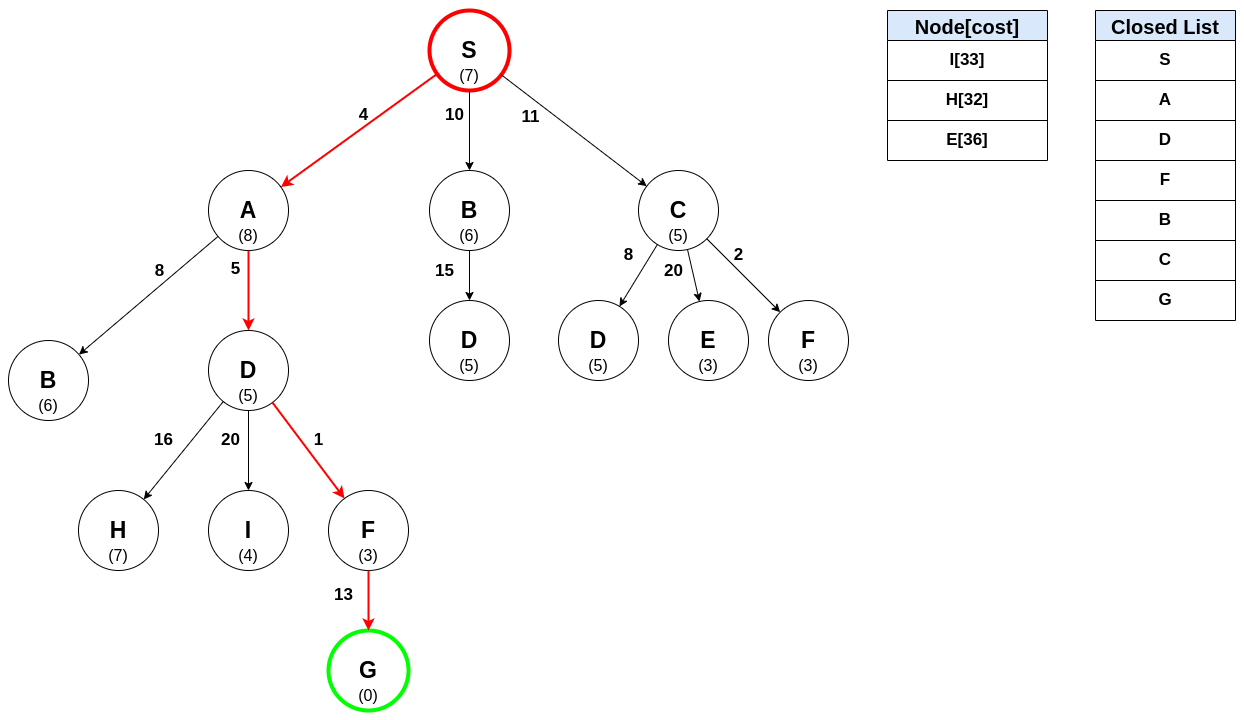

source: https://www.codecademy.com/resources/docs/ai/search-algorithms/a-star-search

In [ ]:
adjacency_list = {
    'S': [('A', 4), ('B', 10), ('C', 11)],
    'A': [('B', 8), ('D', 5)],
    'B': [('D', 15)],
    'C': [('D', 8), ('E', 20), ('F', 2)],
    'D': [('F', 1), ('H', 16), ('I', 20)],
    'E': [('G', 19)],
    'F': [('G', 13)],
    'G': [],
    'H': [('I', 1), ('J', 2)],
    'I': [('G', 5), ('J', 5), ('K', 13)],
    'J': [('K', 7)],
    'K': [('G', 16)]
}

heuristic = {
    'S': 7,
    'A': 8,
    'B': 6,
    'C': 5,
    'D': 5,
    'E': 3,
    'F': 3,
    'G': 0,
    'H': 7,
    'I': 4,
    'J': 5,
    'K': 3
}

graph = Graph(adjacency_list, heuristic)
graph.a_star_algorithm('S', 'G');

Path found: ['S', 'A', 'D', 'F', 'G']


## [B]. Provide two manual examples [The sequence of tree processing using min-max search] and write a python script for each.

### Example 1

MAX wants to find a sequence of actions leading to a win, but MIN has something to say about it. This means that MAX ’s strategy must be a conditional plan—a contingent strategy specifying a response to each of MIN ’s possible moves.

Consider the trivial game in the figure below. The possible moves for MAX at the root node are labeled $a_1$, $a_2$, and $a_3$. The possible replies to $a_1$ for MIN are $b_1$, $b_2$, $b_3$, and so on. This particular game ends after one move each by MAX and MIN.
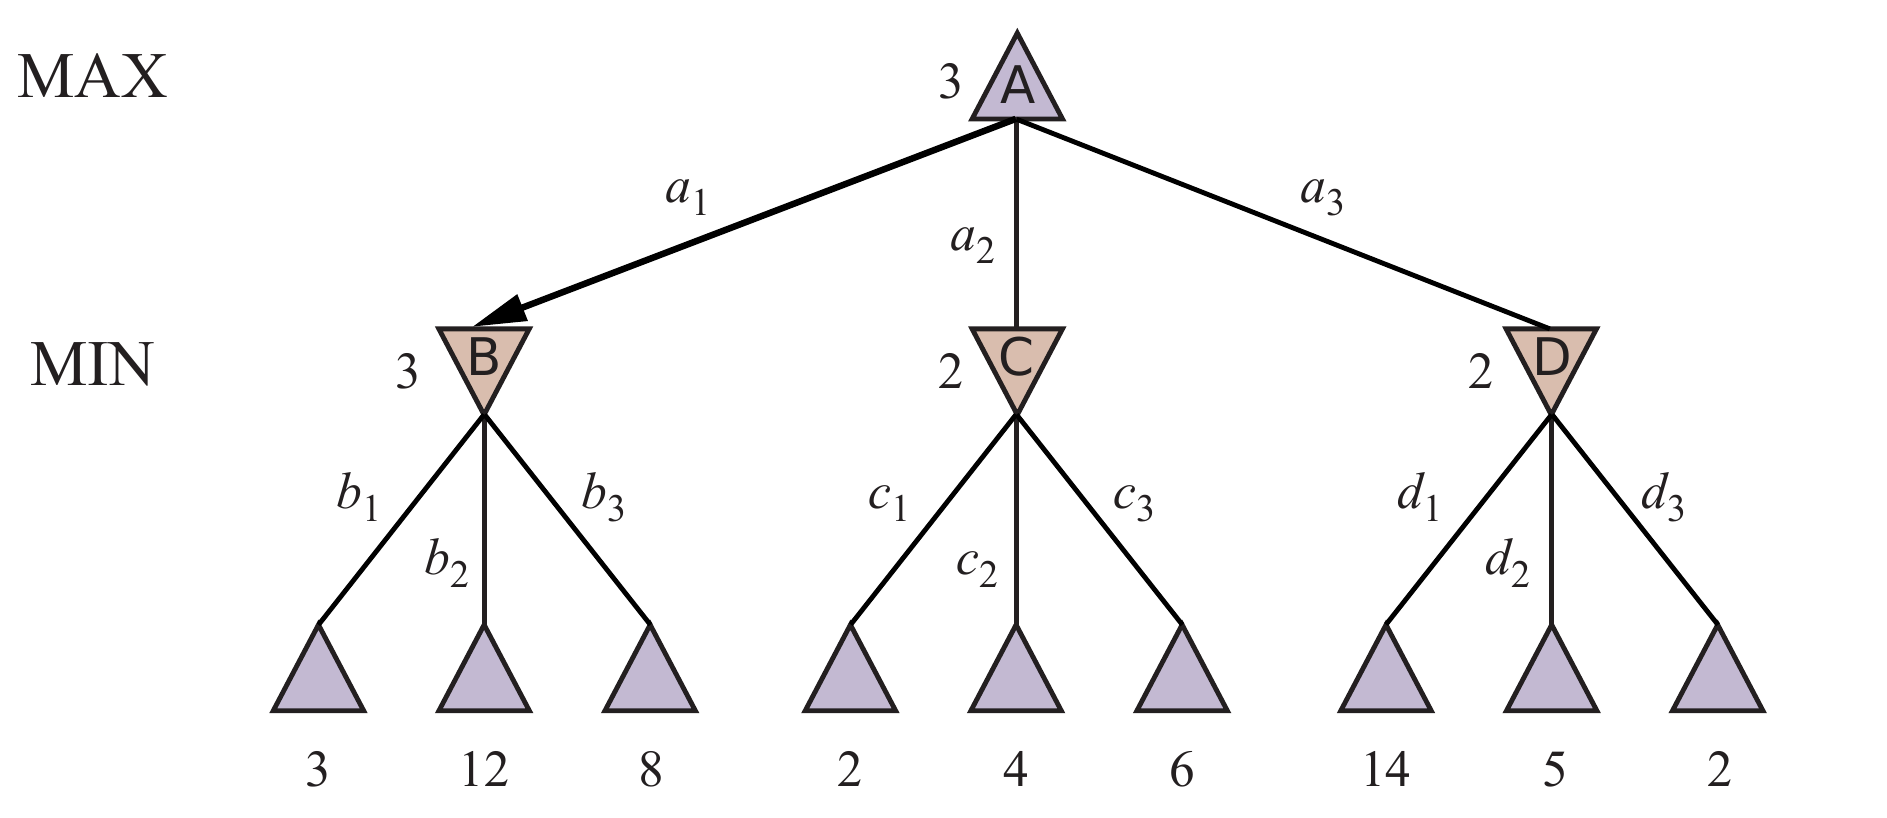

Given a game tree, the optimal strategy can be determined by working out the **minimax value** of each state in the tree, which we write as `MINIMAX(s)`. The minimax value is the utility (for MAX) of being in that state, *assuming that both players play optimally* from there to the end of the game. The minimax value of a terminal state is just its utility. In a non-terminal state, MAX prefers to move to a state of maximum value when it is MAX’s turn to move, and MIN prefers a state of minimum value (that is, inimum value for MAX and thus maximum value for MIN). So we ave:
$$MINIMAX(s) =\begin{cases}
UTILITY(s, MAX) & \text{ if } IS-TERMINAL(s) \\
max_{a ∈ Action(s)}MINIMAX(RESULT(s, a)) & \text{ if } TO-MOVE(s)=MAX\\
min_{a ∈ Action(s)}MINIMAX(RESULT(s, a)) & \text{ if } TO-MOVE(s)=MIN
\end{cases}$$

Let us apply these definitions to the game tree. The terminal nodes on the bottom level get their utility values from the game’s UTILITY function. The first MIN node, labeled *B*, has three successor states with values 3, 12, and 8, so its minimax value is 3. Similarly,
the other two MIN nodes have minimax value 2. The root node is a MAX node; its successor states have minimax values 3, 2, and 2; so it has a minimax value of 3. We can also identify the minimax decision at the root: action $a_1$ is the optimal choice for MAX because it leads to the state with the highest minimax value.

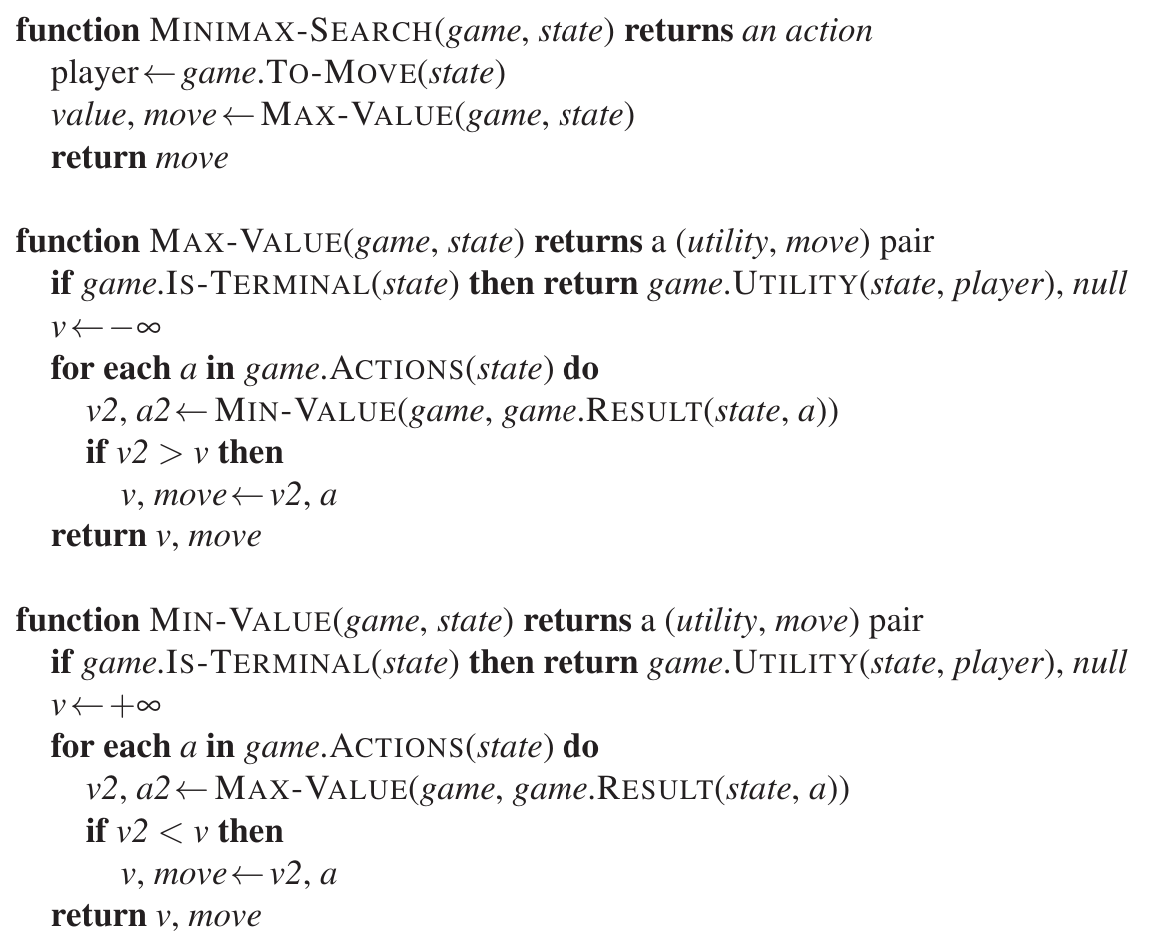

source: Artificial Intelligence: A Modern Approach 4th Edition, Peter Norvig, Stuart Russell, Pearson, 2021

#### code

In [ ]:
adjacency_list = {
    'A': ['B', 'C', 'D'],
    'B': ['E', 'F', 'G'],
    'C': ['H', 'I', 'J'],
    'D': ['K', 'L', 'M']
}

utility = {
    'E': 3,
    'F': 12,
    'G': 8,
    'H': 2,
    'I': 4,
    'J': 6,
    'K': 14,
    'L': 5,
    'M': 2,
}

In [ ]:
def minimax(state, max_turn):
    if state not in adjacency_list:
        # We're at the end. Time to evaluate the state we're in
        return utility[state]

    possible_new_states = adjacency_list[state]

    if max_turn: # Is the current player the maximizer?
        scores = [
            minimax(new_state, max_turn=False)
            for new_state in possible_new_states
        ]
        return max(scores)
    else: # Or the minimizer?
        scores = [
            minimax(new_state, max_turn=True)
            for new_state in possible_new_states
        ]
        return min(scores)

In [ ]:
minimax('A', True)

3

source: https://realpython.com/python-minimax-nim/

### Example 2

![](https://upload.wikimedia.org/wikipedia/commons/6/6f/Minimax.svg)

Suppose the game being played only has a maximum of two possible moves per player each turn. The algorithm generates the tree on the right, where the circles represent the moves of the player running the algorithm (*maximizing player*), and squares represent the moves of the opponent (*minimizing player*). Because of the limitation of computation resources the tree is limited to a *look-ahead* of 4 moves.

The algorithm evaluates each *leaf node* using a heuristic evaluation function, obtaining the values shown. The moves where the *maximizing player* wins are assigned with positive infinity, while the moves that lead to a win of the *minimizing player* are assigned with negative infinity. At level 3, the algorithm will choose, for each node, the **smallest** of the *child node* values, and assign it to that same node (e.g. the node on the left will choose the minimum between "10" and "+∞", therefore assigning the value "10" to itself). The next step, in level 2, consists of choosing for each node the **largest** of the *child node* values. Once again, the values are assigned to each *parent node*. The algorithm continues evaluating the maximum and minimum values of the child nodes alternately until it reaches the *root node*, where it chooses the move with the largest value (represented in the figure with a blue arrow). This is the move that the player should make in order to *minimize* the *maximum* possible loss.

source: https://en.wikipedia.org/wiki/Minimax

In [ ]:
adjacency_list = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J'],
    'F': ['K', 'L'],
    'G': ['M'],
    'H': ['N', 'O'],
    'I': ['P'],
    'J': ['Q'],
    'K': ['R', 'S'],
    'L': ['T'],
    'M': ['U', 'V']
}

utility = {
    'N': 10,
    'O': float('inf'),
    'P': 5,
    'Q': -10,
    'R': 7,
    'S': 5,
    'T': float('-inf'),
    'U': -7,
    'V': -5,
}

minimax('A', True)

-7

## [C]. Provide one example for Depth First Search (DFS), Breadth First Search (BFS), and Uniform Cost Search (UCS) and write a python script of each example.

### Breadth-first search

When all actions have the same cost, an appropriate strategy is **breadth-first search**, in which the root node is expanded first, then all the successors of the root node are expanded next, then their successors, and so on. This is a systematic search strategy that is therefore complete even on infinite state spaces. We could implement breadth-first search as a call to BEST-FIRST-SEARCH where the evaluation function $f(n)$ is the depth of the node—that is, the number of actions it takes to reach the node.

However, we can get additional efficiency with a couple of tricks. A first-in-first-out queue will be faster than a priority queue, and will give us the correct order of nodes: new nodes (which are always deeper than their parents) go to the back of the queue, and old nodes,
which are shallower than the new nodes, get expanded first. In addition, reached can be a set of states rather than a mapping from states to nodes, because once we’ve reached a state, we can never find a better path to the state. That also means we can do an early goal test,
checking whether a node is a solution as soon as it is generated, rather than the late goal test that best-first search uses, waiting until a node is popped off the queue. Figure below shows the algorithm with the early-goal efficiency enhancements.

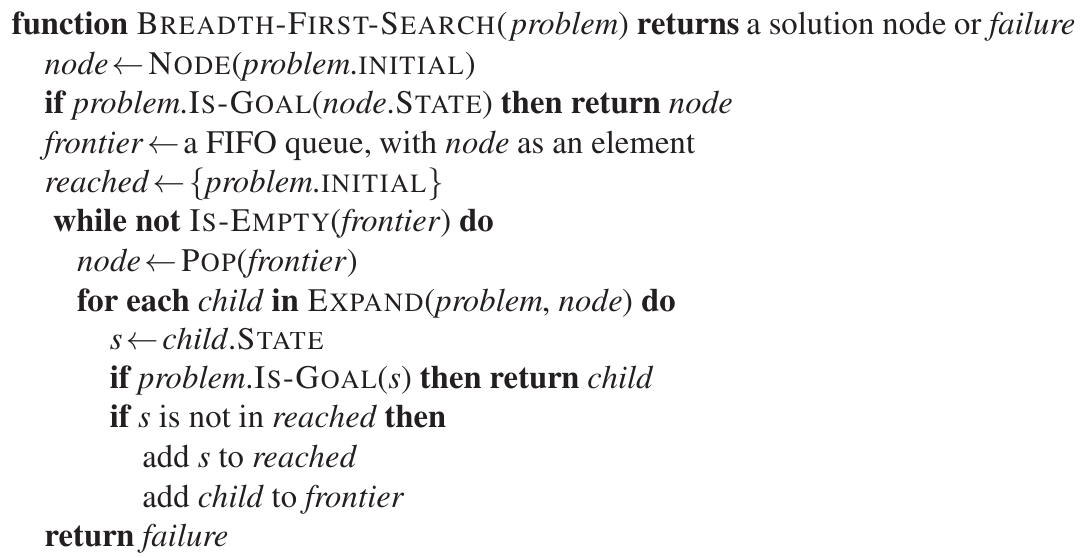

source: Artificial Intelligence: A Modern Approach 4th Edition, Peter Norvig, Stuart Russell, Pearson, 2021

#### Example

Figure below illustrates the progress of BFS on an undirected graph to find node $x$. Each part shows the graph and the queue $Q$ at the beginning of each iteration of the while loop. Vertex distances appear within each vertex and below vertices in the queue. The tan region surrounds the frontier of the search, consisting of the vertices in the queue. The light blue region surrounds the vertices behind
the frontier, which have been dequeued. Each part highlights in orange the vertex dequeued and the breadth-first tree edges added, if any, in the previous iteration. Blue edges belong to the breadth-first tree constructed so far.

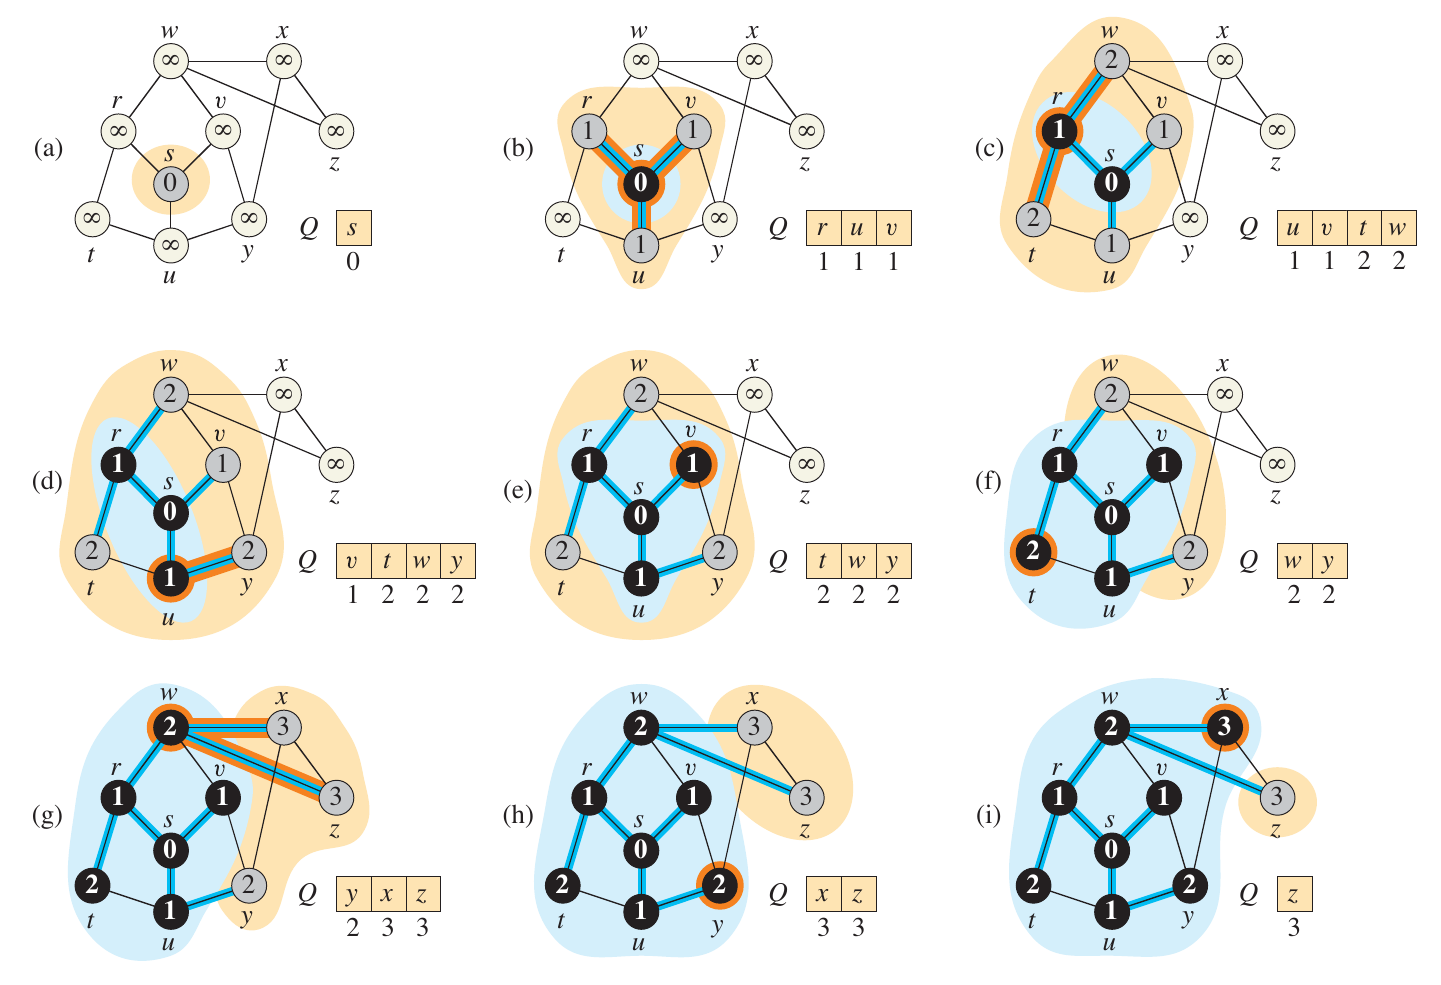

source: Introduction to Algorithms, 4th, Leiserson, Stein, Rivest, Cormen, MIT, Press

#### Code

In [ ]:
def bfs(adjacency_list, start, goal):
    frontier = [start]
    reached = [start]

    parent = {node : None for node in adjacency_list}
    parent[start] = start

    while frontier:
        print('Q', frontier)

        node = frontier.pop(0)

        if node == goal:
            print('Q', frontier)
            return [node := parent[node] for _ in iter(lambda: parent[node] != node, False)][::-1] + [goal]

        for neighbour in adjacency_list[node]:
            if neighbour not in reached:
                reached.append(neighbour)
                frontier.append(neighbour)
                parent[neighbour] = node

In [ ]:
adjacency_list = {
    'R': ['S', 'T', 'W'],
    'S': ['R', 'U', 'V'],
    'T': ['R', 'U'],
    'U': ['S', 'T', 'Y'],
    'V': ['S', 'W', 'Y'],
    'W': ['R', 'V', 'X', 'Z'],
    'X': ['W', 'Y', 'Z'],
    'Y': ['U', 'V', 'X'],
    'Z': ['W', 'X']
}

path = bfs(adjacency_list, 'S', 'X')
print('Path:', ' '.join(path))

Q ['S']
Q ['R', 'U', 'V']
Q ['U', 'V', 'T', 'W']
Q ['V', 'T', 'W', 'Y']
Q ['T', 'W', 'Y']
Q ['W', 'Y']
Q ['Y', 'X', 'Z']
Q ['X', 'Z']
Q ['Z']
Path: S R W X


### uniform-cost search

When actions have different costs, an obvious choice is to use best-first search where the evaluation function is the cost of the path from the root to the current node. This is called Dijkstra’s algorithm by the theoretical computer science community, and uniform-cost search by the AI community. The idea is that while breadth-first search spreads out in waves of uniform depth—first depth 1, then depth 2, and so on—uniform-cost search spreads out in waves
of uniform path-cost. The algorithm can be implemented as a call to BEST-FIRST-SEARCH with PATH-COST as the evaluation function, figure below.

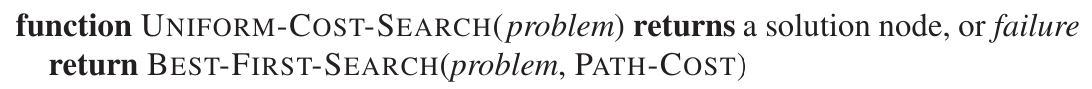

source: Artificial Intelligence: A Modern Approach 4th Edition, Peter Norvig, Stuart Russell, Pearson, 2021

#### Example

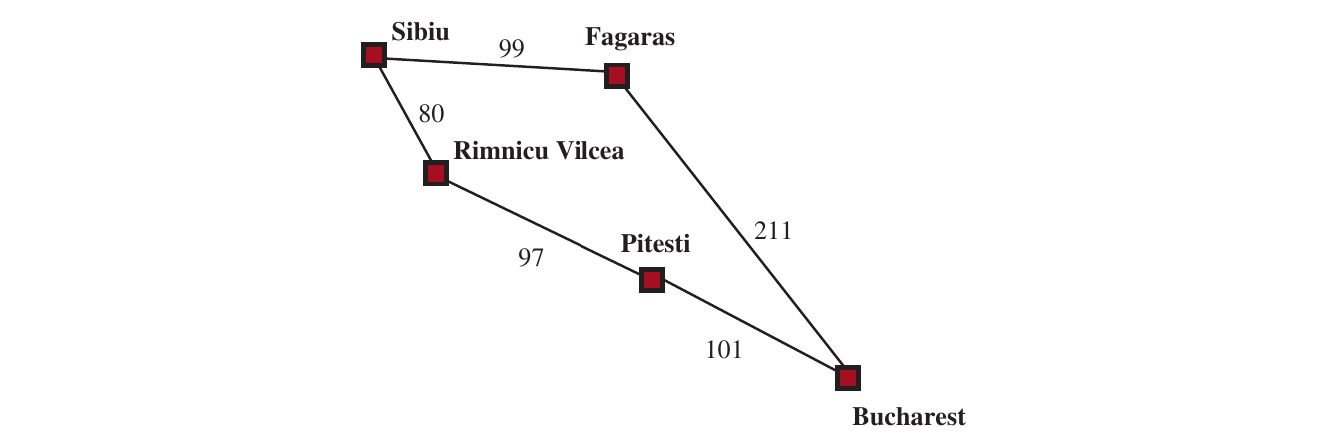

Consider above figure, where the problem is to get from Sibiu to Bucharest. The successors of Sibiu are Rimnicu Vilcea and Fagaras, with costs 80 and 99, respectively. The least-cost node, Rimnicu Vilcea, is expanded next, adding Pitesti with cost 80 + 97 = 177. The least-cost node is now Fagaras, so it is expanded, adding Bucharest with cost 99 + 211 = 310. Bucharest is the goal, but the algorithm tests for goals only when it expands a node, not when it generates a node, so it has not yet detected that this is a path to the goal. \\
The algorithm continues on, choosing Pitesti for expansion next and adding a second path to Bucharest with cost 80 + 97 + 101 = 278. It has a lower cost, so it replaces the previous path in reached and is added to the frontier. It turns out this node now has the lowest cost, so it is considered next, found to be a goal, and returned. Note that if we had checked for a goal upon generating a node rather than when expanding the lowest-cost node, then we would have returned a higher-cost path.

source: Artificial Intelligence: A Modern Approach 4th Edition, Peter Norvig, Stuart Russell, Pearson, 2021

#### code

In [ ]:
from heapq import heappush, heappop

def ucs(adjacency_list, start, goal):

    frontier = []
    explored = set()

    heappush(frontier, (0, start))

    while frontier:
        cost, node = heappop(frontier)
        if node == goal:
            return cost

        if node in explored:
            continue
        for neighbour, dist in adjacency_list[node]:
            if neighbour not in explored:
                heappush(frontier, (cost + dist, neighbour))

        explored.add(node)

    return None

In [ ]:
adjacency_list = {
    'Sibiu': [('Rimnicu', 80), ('Fagaras', 99)],
    'Rimnicu': [('Pitesti', 97)],
    'Pitesti': [('Bucharest', 101)],
    'Fagaras': [('Bucharest', 211)],
    'Bucharest': []
}

ucs(adjacency_list, 'Sibiu', 'Bucharest')

278

### Depth-first search

**Depth-first search** always expands the *deepest* node in the frontier first. It could be implemented as a call to BEST-FIRST-SEARCH where the evaluation function $f$ is the negative of the depth. However, it is usually implemented not as a graph search but as a tree-like
search that does not keep a table of reached states. The progress of the search is illustrated in figure below; search proceeds immediately to the deepest level of the search tree, where the nodes have no successors. The search then “backs up” to the next deepest node that still has unexpanded successors. Depth-first search is not cost-optimal; it returns the first solution it finds, even if it is not cheapest.

source: Artificial Intelligence: A Modern Approach 4th Edition, Peter Norvig, Stuart Russell, Pearson, 2021

#### Example

A dozen steps (left to right, top to bottom) in the progress of a depth-first search on a binary tree from start state **A** to goal **M**. The frontier is in green, with a triangle marking the node to be expanded next. Previously expanded nodes are lavender, and potential future nodes have faint dashed lines. Expanded nodes with no descendants in the frontier (very faint lines) can be discarded.

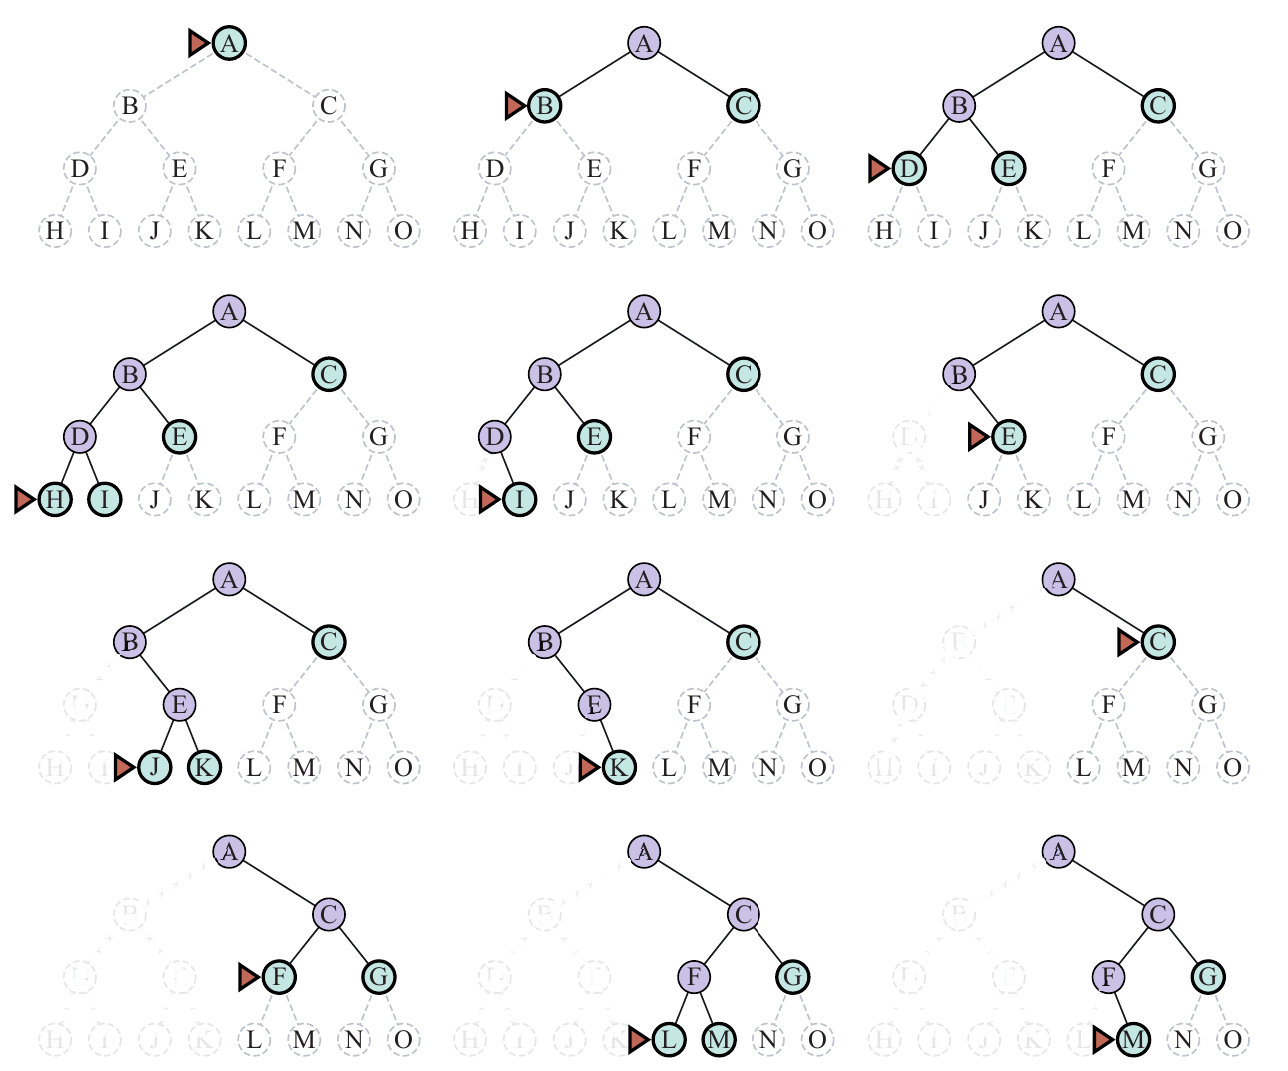

source: Artificial Intelligence: A Modern Approach 4th Edition, Peter Norvig, Stuart Russell, Pearson, 2021

#### code

In [ ]:
def dfs(adjacency_list, node, goal, frontier=[], reached=[]):
    if node == goal:
        return [node]

    frontier.append(node)
    reached.append(node)

    for neighbour in adjacency_list[node]:
        if neighbour not in reached:
            path = dfs(adjacency_list, neighbour, goal, frontier, reached)
            if path != None:
                return [node] + path

In [ ]:
adjacency_list = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O'],
    'H': [],
    'I': [],
    'J': [],
    'K': [],
    'L': [],
    'M': [],
    'N': [],
    'O': [],
}

dfs(adjacency_list, 'A', 'M')

['A', 'C', 'F', 'M']

## [D]. The goal is to color with four colors so that no adjacent regions have the same color. Write a Python script and solve this problem and explain your approach.

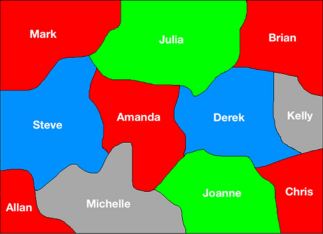

#### Install and Import necessary libararies

In [ ]:
pip install simpleai -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from simpleai.search import CspProblem, backtrack

#### Simulate the figure with a graph such that each region is assigned to a unique vertex and two vertices have an edge between them if their regions are adjacent.

In [ ]:
vertices = ['Mark', 'Julia', 'Brian', 'Steve', 'Amanda', 'Derek', 'Kelly', 'Allan', 'Michelle', 'Joanne', 'Chris']

edges = [
    ('Mark', 'Julia'),
    ('Mark', 'Steve'),
    ('Julia', 'Steve'),
    ('Julia', 'Amanda'),
    ('Julia', 'Derek'),
    ('Julia', 'Brian'),
    ('Brian', 'Derek'),
    ('Brian', 'Kelly'),
    ('Steve', 'Amanda'),
    ('Steve', 'Allan'),
    ('Steve', 'Michelle'),
    ('Amanda', 'Derek'),
    ('Amanda', 'Michelle'),
    ('Amanda', 'Joanne'),
    ('Derek', 'Kelly'),
    ('Derek', 'Joanne'),
    ('Derek', 'Chris'),
    ('Kelly', 'Chris'),
    ('Allan', 'Michelle'),
    ('Michelle', 'Joanne'),
    ('Joanne', 'Chris')
]

#### Each vertex can have different four colors

In [ ]:
domains = {vertex : ['red', 'green', 'blue', 'gray'] for vertex in vertices}

#### Define the simple constraint satisfaction problem as a graph with different colors for its adjacent vertices

In [ ]:
def constraint_func(names, values):
    return values[0] != values[1]

constraints = [(edge, constraint_func) for edge in edges]

#### Make an instance of CspProblem

In [ ]:
problem = CspProblem(vertices, domains, constraints)

#### Now, with our csp problem instantiated, Call the csp backtracking search algorithms

In [ ]:
backtrack(problem)

{'Mark': 'red',
 'Julia': 'green',
 'Brian': 'red',
 'Steve': 'blue',
 'Amanda': 'red',
 'Derek': 'blue',
 'Kelly': 'green',
 'Allan': 'red',
 'Michelle': 'green',
 'Joanne': 'gray',
 'Chris': 'red'}

source: https://simpleai.readthedocs.io/en/latest/constraint_satisfaction_problems.html